## **PROJET INFO-F422**

Students:


*   Bryan
*   Maroua
*   Nassim



L'objectif principal est de développer des modèles de régression capables de prédire les angles continus d'articulation de la main (51 valeurs) à partir de signaux d'électromyographie de surface (SEMG) enregistrés sur l'avant-bras d'un participant. Le projet utilise deux ensembles de données : un pour des gestes guidés prédéfinis et un autre pour des gestes libres et naturels.



1.   DATA



In [1]:
!conda --version

conda 24.11.3


In [2]:
import numpy as np

user_path = {}
user_path["M"] = ['/content/gdrive/My Drive/INFO-F422 - Project/Guided/guided_dataset_X.npy',
                  '/content/gdrive/My Drive/INFO-F422 - Project/Guided/guided_dataset_y.npy']
user_path['N'] = ['/content/gdrive/My Drive/B. Statistical/Projet/F422 EMG project data/guided/guided_dataset_X.npy',
               '/content/gdrive/My Drive/B. Statistical/Projet/F422 EMG project data/guided/guided_dataset_y.npy']
user_path['B'] = ['guided/guided_dataset_X.npy',
'guided/guided_dataset_y.npy']
# Chemins vers les fichiers
file_pathX = user_path["B"][0]
file_pathY = user_path["B"][1]

Types de données:


*   Signaux SEMG (Surface Electromyography) bruts : Ce sont les données
d'entrée principales. Elles proviennent de **8 capteurs** sans fil placés sur l'avant-bras du participant et mesurent l'activité électrique des muscles. Les signaux SEMG, qui constituent vos données d'entrée (souvent notées X ou x_t), représentent les potentiels électriques, c'est-à-dire le voltage, généré par l'activité musculaire de l'avant-bras, mesuré par 8 électrodes. Ces mesures de voltage sont prises à une fréquence élevée de 1024 Hz, fournissant ainsi 1024 échantillons par seconde pour chaque électrode.

* Angles d'Articulation de la Main (Hand Pose) : Ce sont les données cibles (à prédire). Elles consistent en **51 valeurs continues** représentant les angles de 17 articulations de la main, capturées par un casque VR (Oculus Quest).

## Shapes des Données (Format Fichiers .npy)

### 1. Données "Guided Gestures"

* **`guided_dataset_X.npy`** (Entrée Entraînement/Validation - SEMG):
    * **Shape**: `(5, 8, 230000)`
    * *Dimensions*: (session, électrode, temps)
* **`guided_dataset_y.npy`** (Cible Entraînement/Validation - Pose):
    * **Shape**: `(5, 51, 230000)`
    * *Dimensions*: (session, angle articulaire, temps)
* **`guided_testset_X.npy`** (Entrée Test - SEMG):
    * **Shape**: `(5, 332, 8, 500)`
    * *Dimensions*: (session, fenêtre, électrode, temps dans la fenêtre)

### 2. Données "Free Gestures"

* **`freemoves_dataset_X.npy`** (Entrée Entraînement/Validation - SEMG):
    * **Shape**: `(5, 8, 270000)`
    * *Dimensions*: (session, électrode, temps)
* **`freemoves_dataset_y.npy`** (Cible Entraînement/Validation - Pose):
    * **Shape**: `(5, 51, 270000)`
    * *Dimensions*: (session, angle articulaire, temps)
* **`freemoves_testset_X.npy`** (Entrée Test - SEMG):
    * **Shape**: `(5, 308, 8, 500)`
    * *Dimensions*: (session, fenêtre, électrode, temps dans la fenêtre)

### 3. Shapes Attendues pour la Soumission

* Prédictions pour `guided_testset_X.npy`: **`(1660, 51)`**
* Prédictions pour `freemoves_testset_X.npy`: **`(1540, 51)`**
* Fichier `.csv` final (concaténé): **`(3200, 51)`**

In [3]:
try:
  guided_X = np.load(file_pathX)
  guided_Y = np.load(file_pathY)
except FileNotFoundError:
    print(f"Error: File not found at {file_pathY}. Please check the path.")
except Exception as e:
    print(f"An error occurred while loading dataY: {e}")

On veut les temps sur les lignes et les EMGS/JOINTS en colonnes

In [4]:
#Reformater en (5, 230000, 8) pour X
dataX = np.transpose(guided_X, (0, 2, 1))

# Reformater en (5, 230000, 51) pour Y
dataY = np.transpose(guided_Y, (0, 2, 1))

# Vérification des shapes
print("Shape de dataX:", dataX.shape)  # Doit afficher (5, 230000, 8)
print("Shape de dataY:", dataY.shape)  # Doit afficher (5, 230000, 51)

Shape de dataX: (5, 230000, 8)
Shape de dataY: (5, 230000, 51)


In [5]:
import numpy as np
import pandas as pd

def extract_session_data(dataX, dataY, session_idx=0):
    """
    Extrait les données EMG et Joint Angles d'une session spécifique
    sous forme de DataFrames propres.

    Args:
        dataX (numpy.ndarray): Données EMG (shape: (5, 230000, 8))
        dataY (numpy.ndarray): Données Angles (shape: (5, 230000, 51))
        session_idx (int): Index de la session à extraire (par défaut 0)

    Returns:
        df_emg (pd.DataFrame): DataFrame avec les signaux EMG
        df_joints (pd.DataFrame): DataFrame avec les angles articulaires
    """

    # ----- Signaux EMG -----
    session_data_emg = dataX[session_idx]  # (230000, 8)
    df_emg = pd.DataFrame(session_data_emg, columns=[f'EMG_{i+1}' for i in range(session_data_emg.shape[1])])

    # ----- Angles articulaires -----
    session_data_joints = dataY[session_idx]  # (230000, 51)
    df_joints = pd.DataFrame(session_data_joints, columns=[f'Joint_{i+1}' for i in range(session_data_joints.shape[1])])

    return df_emg, df_joints


# Extrait la session (exemple ici session 0)
df_emg, df_joints = extract_session_data(dataX, dataY, session_idx=0)

# Aperçu des premières lignes

print("Premiers instants des signaux EMG :")
print(df_emg.head(10))

print("\nPremiers instants des angles articulaires :")
print(df_joints.head(10))


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\bryan\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\bryan\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\bryan\anaconda3\Lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\bryan\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



Premiers instants des signaux EMG :
       EMG_1      EMG_2      EMG_3      EMG_4      EMG_5      EMG_6     EMG_7  \
0   1.447503  -2.519842  -3.431548 -14.551101   9.008999  -6.128061  6.585124   
1  11.448849 -27.137169  13.042309  12.344713  -5.894418  -8.286748 -6.818692   
2  10.966602 -25.669575  30.187789  17.807764  -1.391771  -0.596492  8.883394   
3  -0.372605  -9.807298   8.831421  19.798811 -11.487393  -2.230163 -1.178838   
4  -1.220629   7.147789  -7.101316   1.545637   3.036702 -13.426975 -3.173392   
5  -1.395730  10.744989   3.253534   1.535868  -6.069433 -12.943470  4.974815   
6  -2.202977   6.184262   8.019242  -4.554623  -5.972149  -4.879697 -1.352961   
7  -2.100518  11.659288  15.551035   0.426225  -5.038026   3.423831  2.787678   
8  -2.192419   3.068883   5.323104   0.331152  -7.413197  -6.041692  7.156853   
9  -5.772013   4.933054  -9.323050   5.584224  -4.423427  -4.071557  0.885027   

       EMG_8  
0   8.032713  
1  14.307336  
2   8.021251  
3   3.123762

De manière générale, l'ensemble des signaux EMG présente une forte activité, caractérisée par de nombreuses variations rapides, ce qui est typique de l'activité musculaire.
Les signaux provenant des électrodes EMG_1, EMG_7 et EMG_8 apparaissent globalement plus calmes que les autres.
À l'inverse, les signaux EMG_2, EMG_4 et EMG_5 montrent une activité plus marquée, avec des pics d'amplitude importants.
Un bruit de fond, sous forme de légères fluctuations autour de zéro, est observable sur la plupart des canaux, bien que certaines électrodes semblent présenter des signaux plus propres que d'autres.

Visualisation des signaux sur la session 1


Visualization of the EMG signals was performed to gain an initial understanding of their overall behavior and to identify whether any particular EMG channel exhibited different characteristics compared to the others.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_emg(df_emg, n_samples=230000, session=0):
    """
    Trace les signaux EMG pour toutes les électrodes sur une seule figure.

    Parameters:
    - df_emg: DataFrame contenant les colonnes 'EMG_1', 'EMG_2', ..., 'EMG_8'
    - n_samples: nombre d'échantillons à afficher
    """
    emg_channels = [f'EMG_{i}' for i in range(1, 9)]  # Liste des noms de colonnes
    time = np.arange(n_samples)

    # Calcul min/max globaux pour avoir une échelle uniforme
    y_min, y_max = np.inf, -np.inf
    for channel in emg_channels:
        emg = df_emg[channel][:n_samples]
        y_min = min(y_min, emg.min())
        y_max = max(y_max, emg.max())

    # Création de la figure avec plusieurs sous-graphes (subplots)
    fig, axes = plt.subplots(len(emg_channels), 1, figsize=(12, 18), sharex=True)

    for i, channel in enumerate(emg_channels):
        emg = df_emg[channel][:n_samples]
        mean_val = emg.mean()
        var_val = emg.var()

        ax = axes[i]
        ax.plot(time, emg, label=channel)
        ax.set_ylim(y_min, y_max)
        ax.set_ylabel('Amplitude')
        ax.legend(loc='upper right')

        # Ajouter texte statistiques
        textstr = f'Mean: {mean_val:.2f}\nVar: {var_val:.2f}'
        ax.text(0.10, 0.95, textstr,
                transform=ax.transAxes,
                fontsize=8, verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.xlabel('Time')
    plt.suptitle(f'Signaux EMG session {session+1} - Toutes les électrodes', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


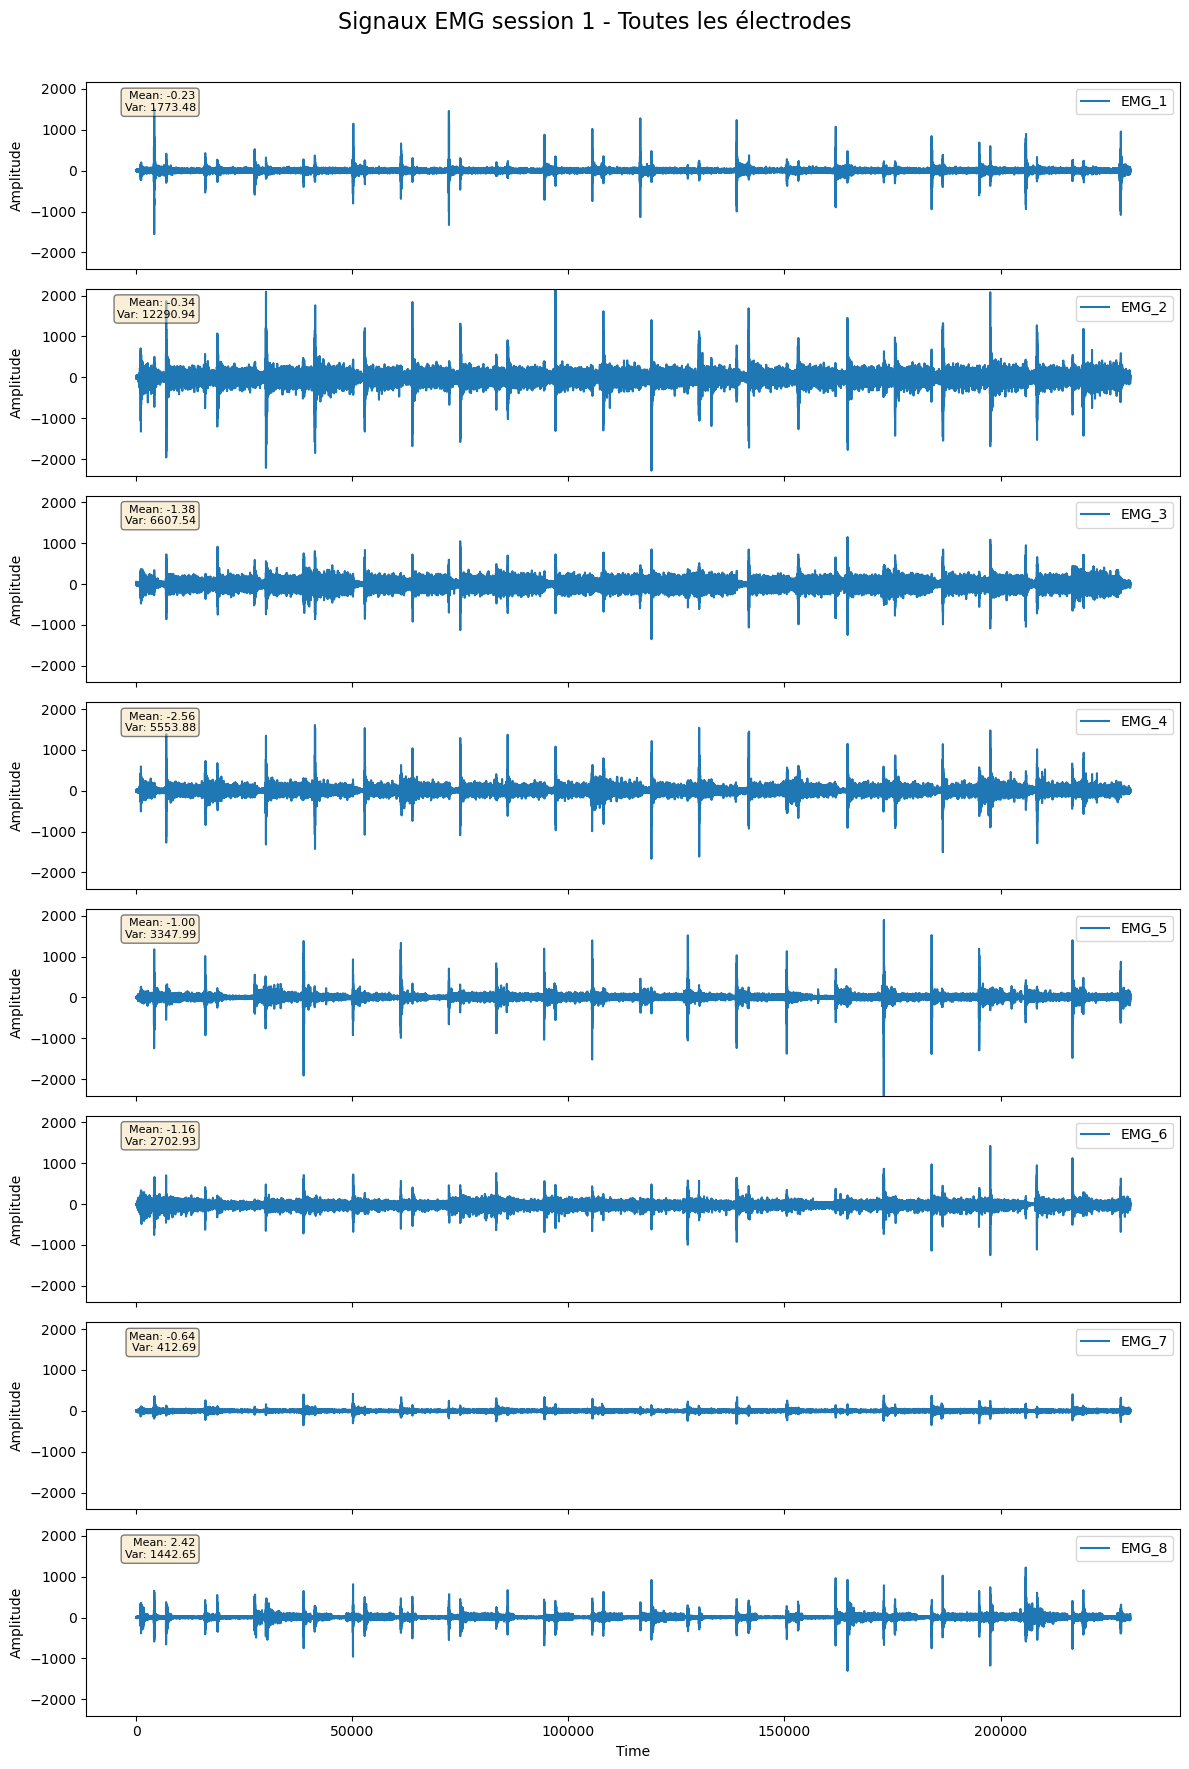

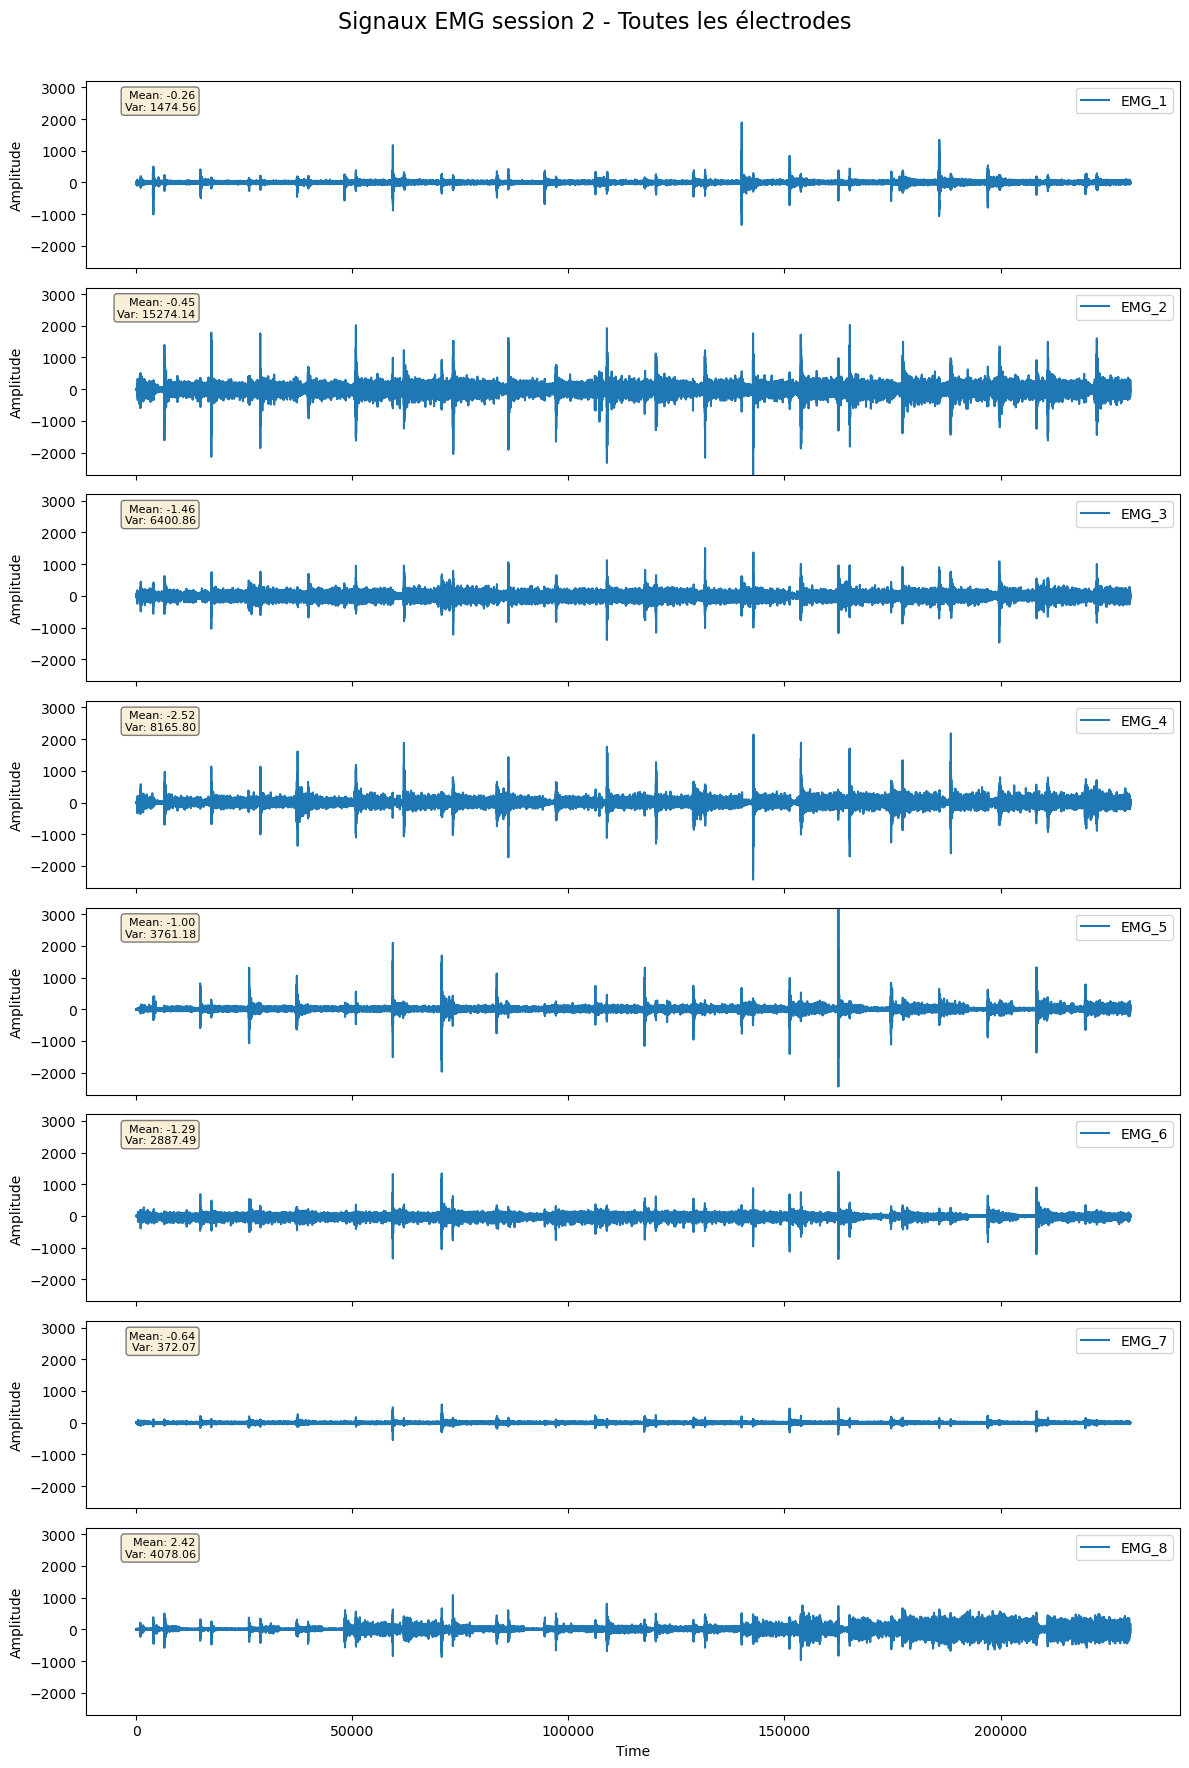

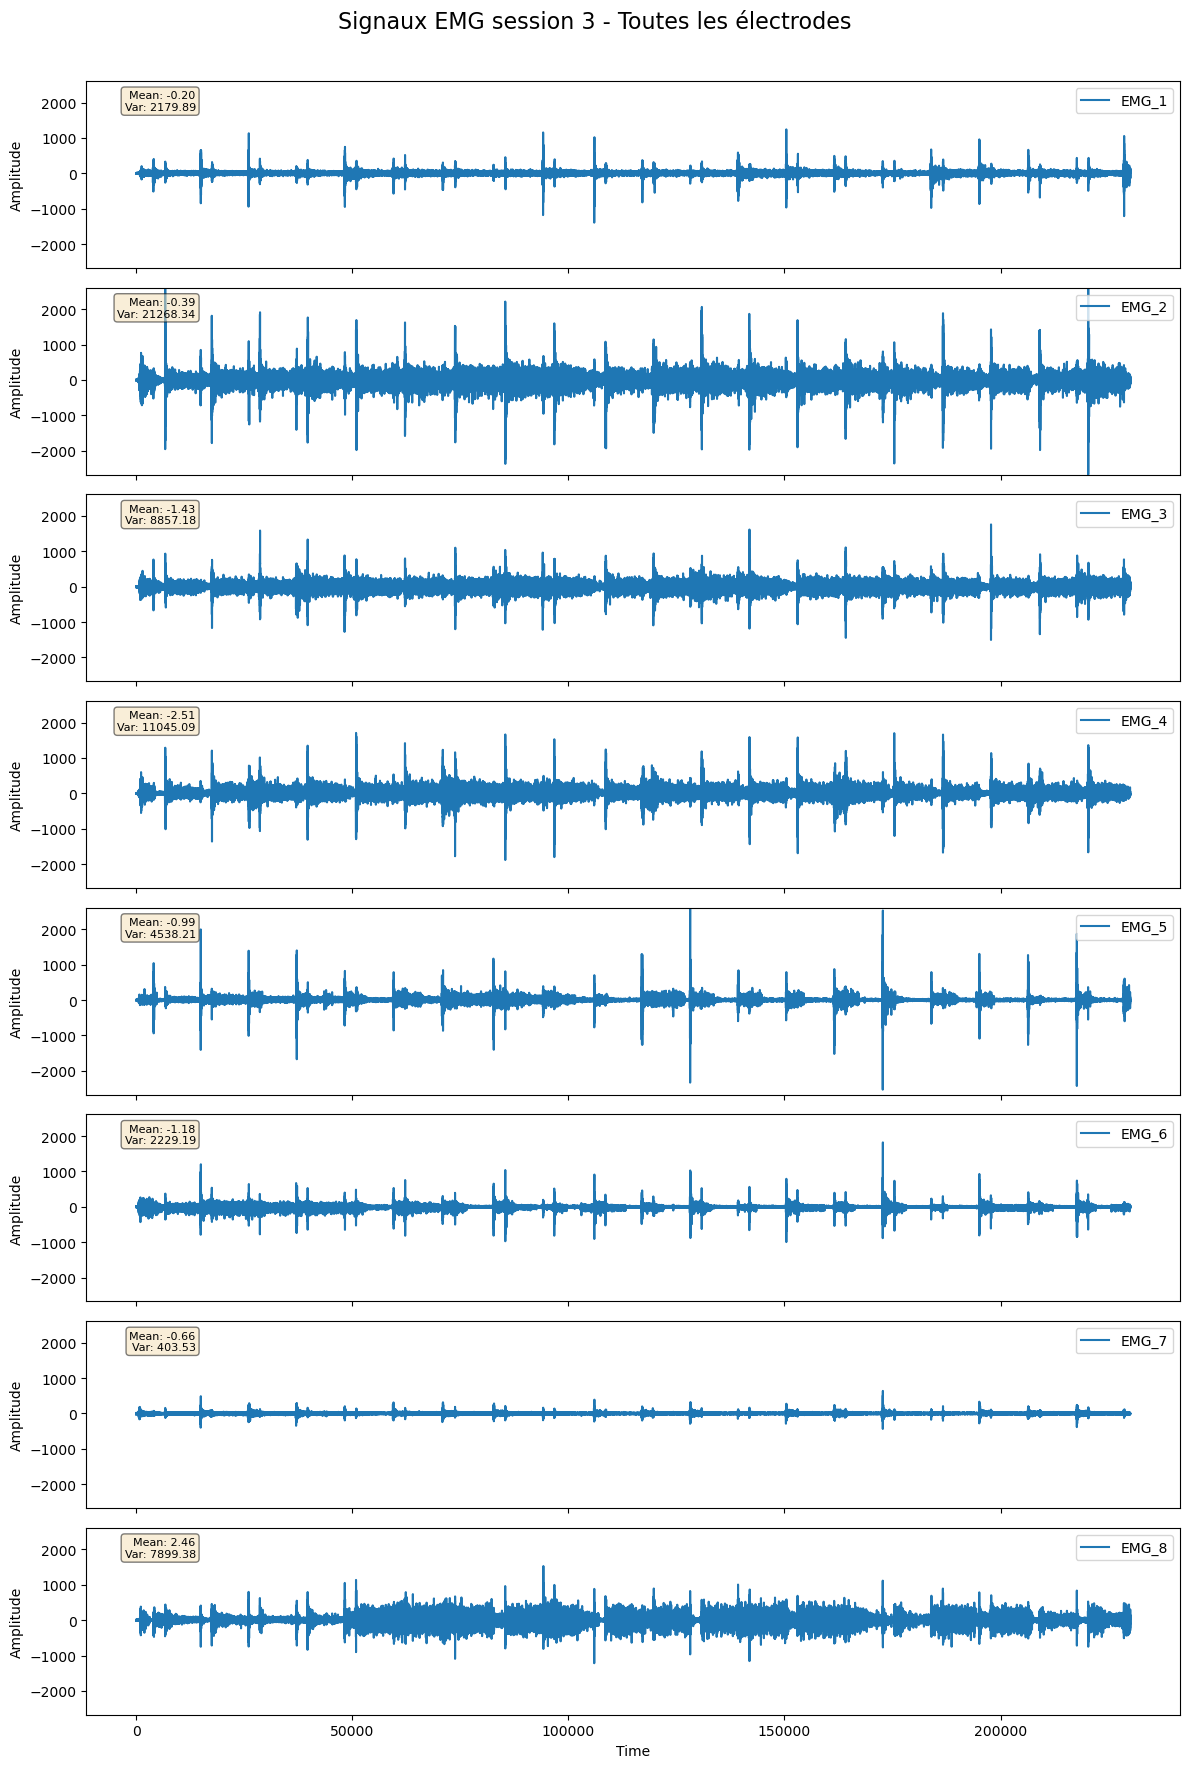

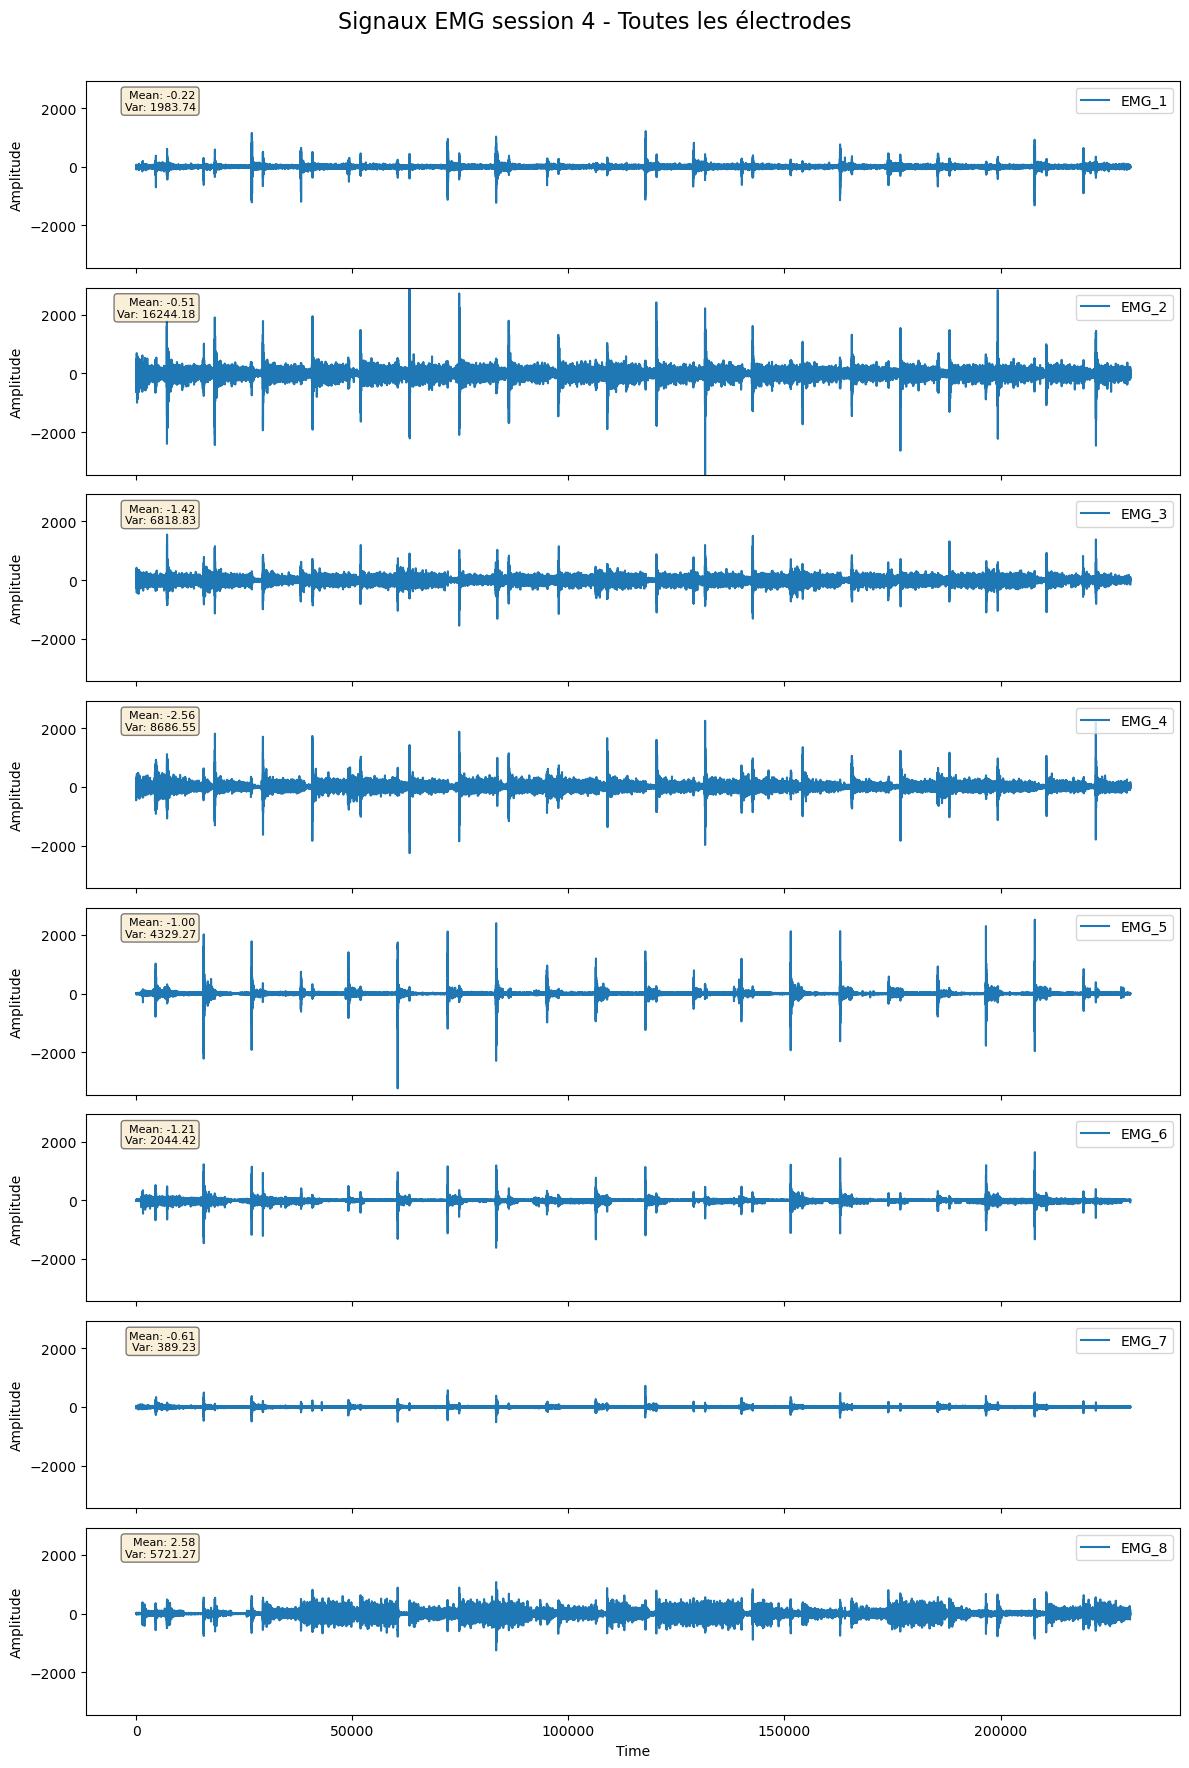

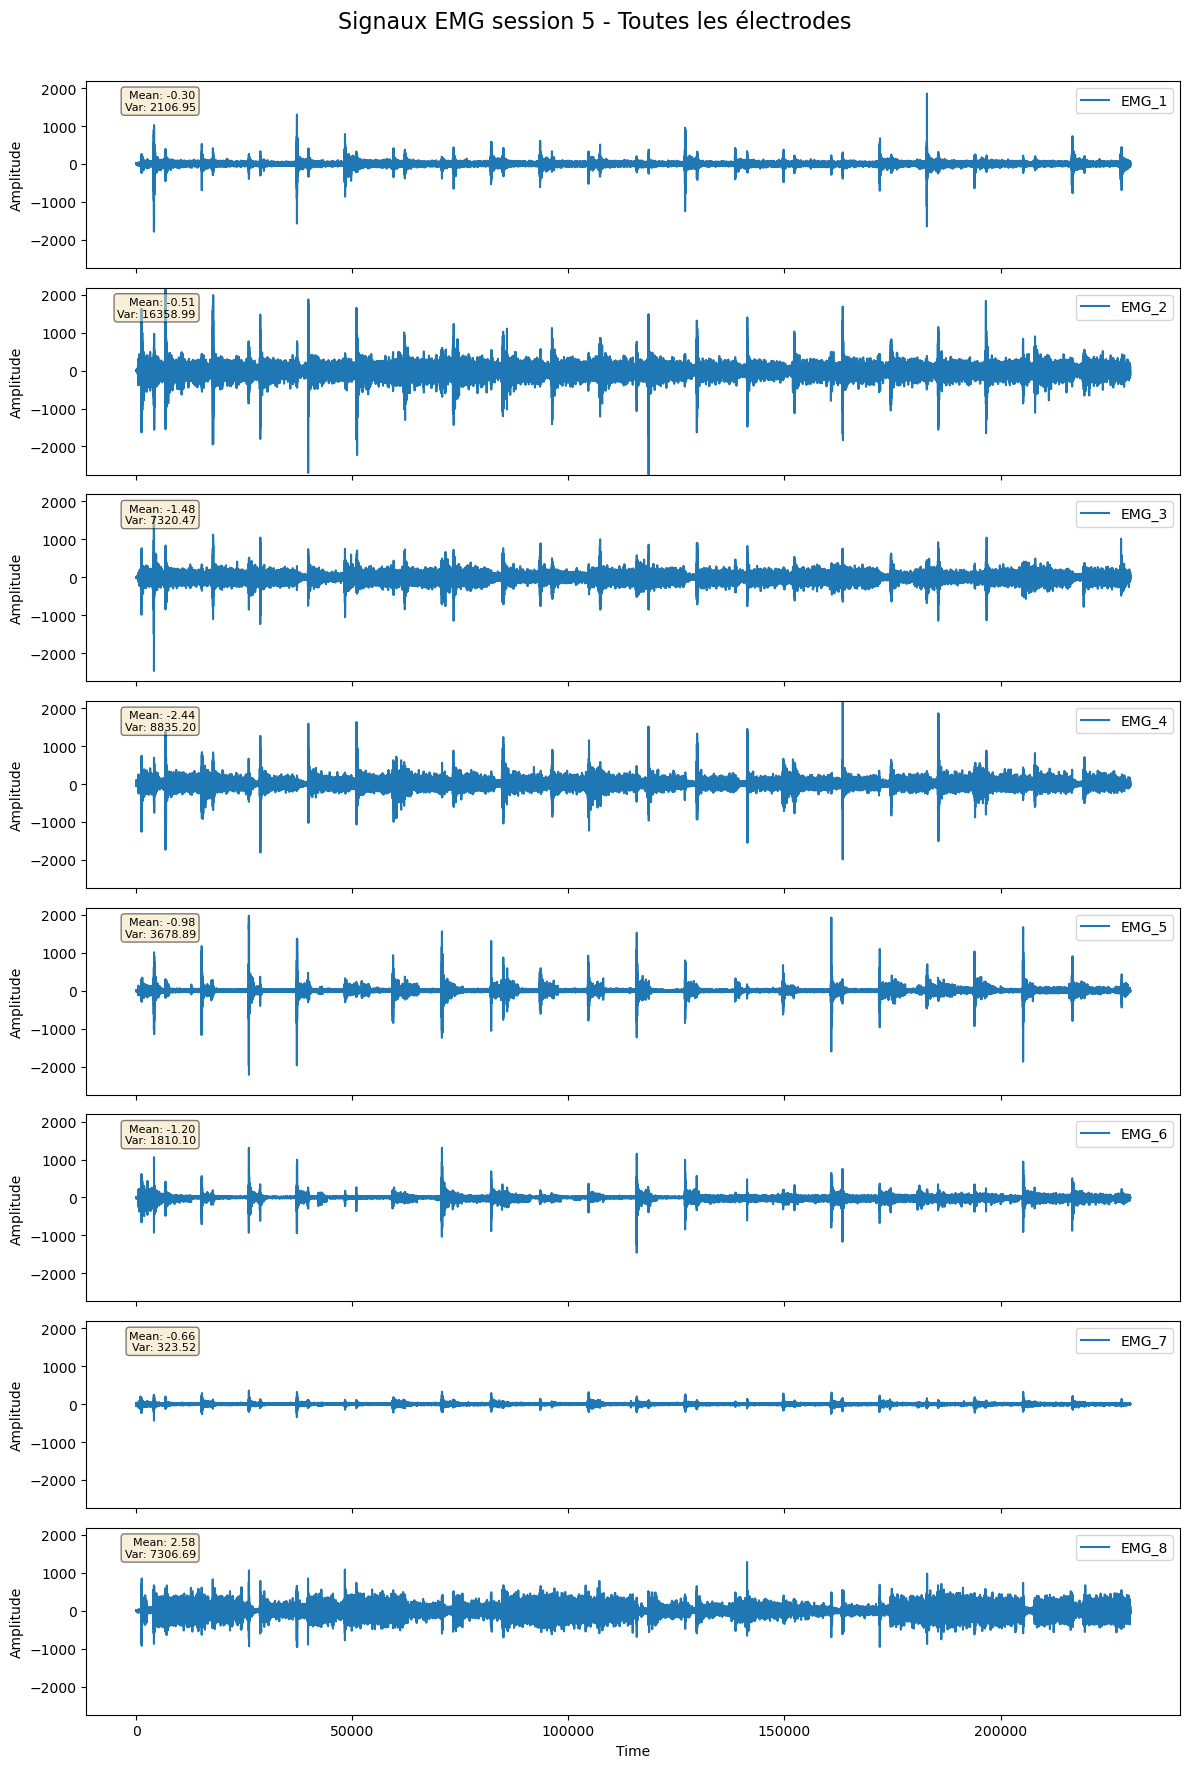

In [7]:
for i in range(5):
    df_emg, df_joints = extract_session_data(dataX, dataY, session_idx=i)
    plot_all_emg(df_emg, n_samples=230000, session=i)

/

**ANALYSE FREQUENTIELLE DEBUT**

/

Fréquence d’échantillonnage (1024Hz) : signal EMG a été mesuré 1024 fois par seconde.

### Comprendre la fréquence d’un signal EMG discret et son utilité pour le nettoyage des données

Ton signal EMG est discret, c’est-à-dire qu’il se compose d’une série de valeurs mesurées à intervalles réguliers. Dans ce projet, les signaux sont échantillonnés à 1024 Hz, ce qui signifie que 1024 mesures sont prises chaque seconde. Même si ce n’est pas un signal continu, on peut analyser comment il varie dans le temps en examinant la fréquence de ses variations.

La fréquence décrit la rapidité des changements dans un signal. Si le signal varie lentement, il est associé à une basse fréquence. Si au contraire il varie très rapidement, on parle de haute fréquence. Pour analyser ces fréquences dans un signal discret, on utilise des outils comme la transformation de Fourier discrète (DFT), qui permet de convertir un signal dans le domaine du temps vers le domaine fréquentiel.

La méthode de Welch, utilisée dans ce contexte via la fonction `scipy.signal.welch`, permet d’estimer la densité spectrale de puissance d’un signal. Elle découpe le signal en segments, applique une DFT sur chaque segment, puis moyenne les résultats. Cela permet d'obtenir un graphe qui indique quelles fréquences sont présentes dans le signal et avec quelle intensité.

Ce graphe, appelé spectre de puissance, est un outil fondamental pour l’analyse de signaux EMG. Il permet d’identifier les bandes de fréquences qui contiennent l’information musculaire utile, typiquement entre 20 et 300 Hz. Il permet également de repérer les fréquences associées à du bruit, comme les très basses fréquences causées par les mouvements de l’électrode ou les hautes fréquences dues à des interférences électroniques.

Dans le cadre du nettoyage des données (data cleaning), analyser ces spectres est très utile. Cela permet de :
- détecter si certaines électrodes capturent peu ou pas de signal utile,
- confirmer que les bandes de fréquence principales sont bien présentes,
- ajuster précisément les filtres passe-bande pour ne conserver que les composantes fréquentielles pertinentes,
- éventuellement repérer des pics suspects liés à des sources de bruit externe (comme le 50 Hz du réseau électrique),
- et éviter d'appliquer un filtrage arbitraire ou inadapté.

En résumé, analyser les spectres permet de mieux comprendre la nature du signal, de justifier les choix de prétraitement, et d’améliorer la qualité des données en réduisant le bruit tout en conservant l’information pertinente pour les modèles d’apprentissage.

------------------------------------

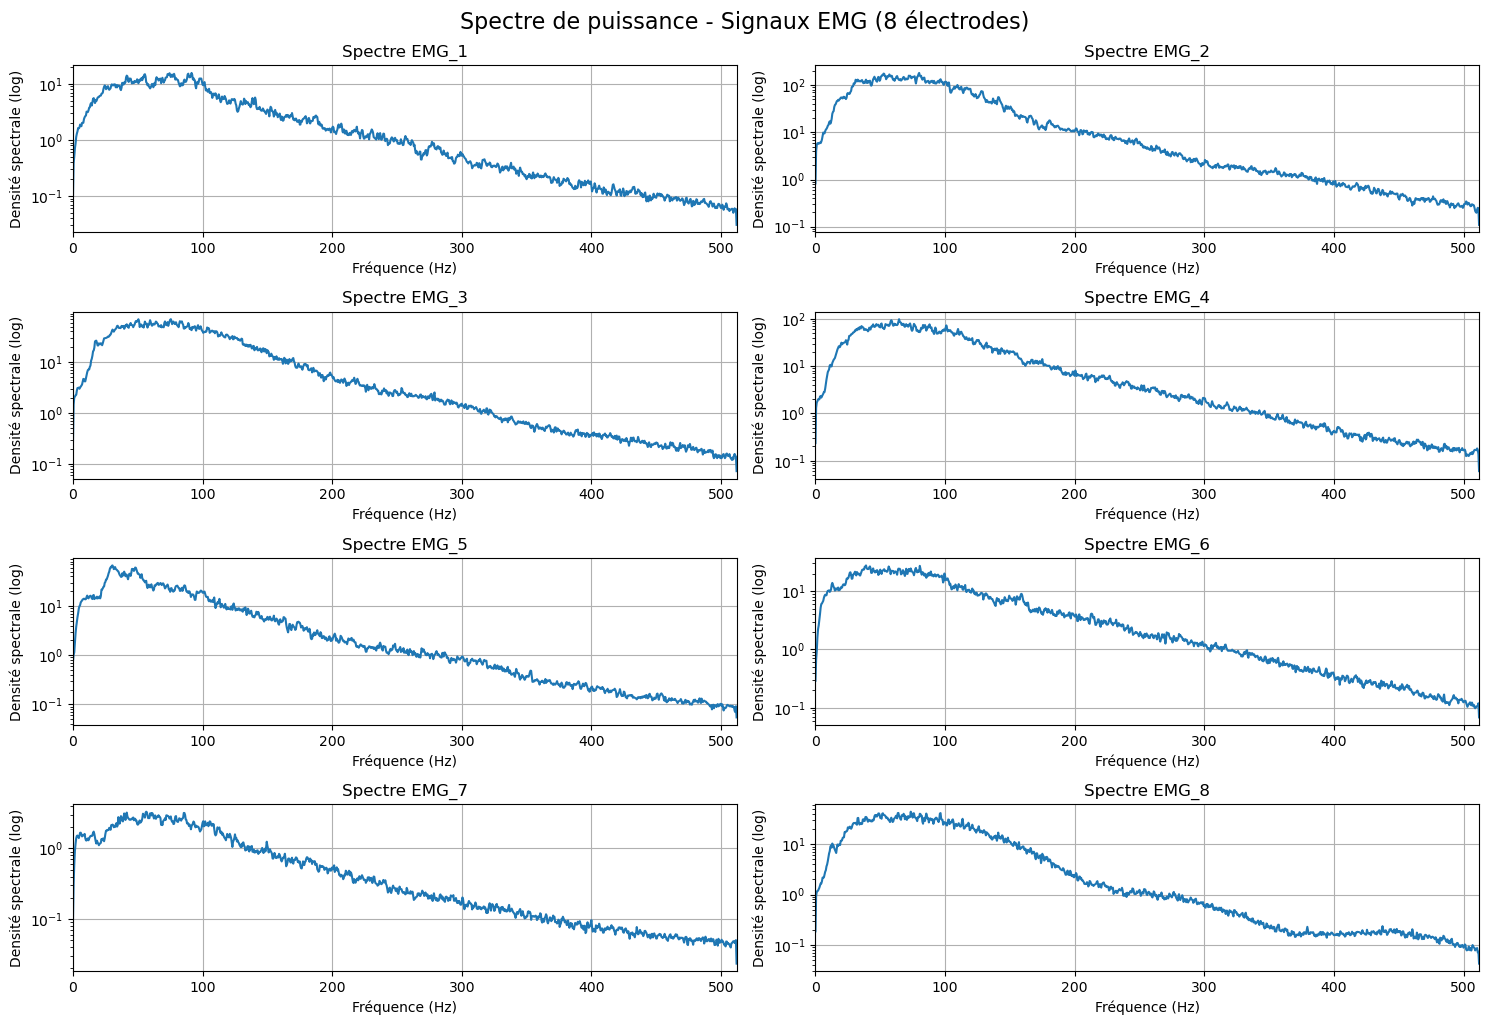

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Paramètres
fs = 1024  # Fréquence d'échantillonnage (Hz)
nperseg = 2048  # Longueur des segments pour Welch

# Extrait les données une seule fois hors de la boucle
df_emg, _ = extract_session_data(dataX, dataY, session_idx=1)

# Création de la figure
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()

# Boucle sur chaque électrode
for i in range(8):
    emg_signal = df_emg[f'EMG_{i+1}'].values  # Récupère la colonne i+1 sous forme de vecteur numpy

    freqs, psd = welch(emg_signal, fs=fs, nperseg=nperseg)

    axes[i].semilogy(freqs, psd)
    axes[i].set_title(f'Spectre EMG_{i+1}')
    axes[i].set_xlim(0, 512)
    axes[i].set_xlabel('Fréquence (Hz)')
    axes[i].set_ylabel('Densité spectrale (log)')
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle('Spectre de puissance - Signaux EMG (8 électrodes)', y=1.02, fontsize=16)
plt.show()


Les signaux EMG contiennent principalement des informations pertinentes dans une plage de fréquences spécifique. Selon les recherches, l'énergie significative du signal EMG se situe généralement entre 20 Hz et 500 Hz. Cette plage est considérée comme la bande passante physiologique du signal EMG (https://www.mdpi.com/1424-8220/21/18/6064)

Voici ce que l’on peut observer sur les spectres affichés :

#### ✅ Points communs positifs
- La majorité des électrodes montrent une **puissance maximale entre 20 Hz et 100 Hz**, ce qui est typique d’un signal EMG sain.
- La puissance chute progressivement à partir de **150–200 Hz**, ce qui suggère que les hautes fréquences contiennent peu d'information utile.

#### 🔍 Observations intéressantes
- **EMG_7** a une puissance **globalement plus faible** et plus plate que les autres. Cela pourrait indiquer une électrode mal positionnée ou un contact moins bon.
- À partir de **450 Hz**, la puissance est négligeable pour toutes les électrodes.

---

### ✅ Conclusion pour le data cleaning

Sur la base de ces spectres, tu peux :

- Appliquer un **filtre passe-bande** entre **20 Hz et 450 Hz** pour toutes les électrodes. Cela éliminera :
  - Le bruit de mouvement (< 20 Hz),
  - Le bruit électronique (> 450 Hz),
  - Tout en conservant la plage utile pour l’analyse musculaire.

- **Surveiller EMG_7**, qui pourrait affecter la qualité des features extraites si elle reste trop silencieuse.


In [9]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt

# --- Paramètres du filtre ---
fs = 1024        # Fréquence d'échantillonnage (Hz)
lowcut = 20      # Fréquence de coupure basse (Hz)
highcut = 450    # Fréquence de coupure haute (Hz)
order = 4        # Ordre du filtre

# --- Fonction de filtre passe-bande ---
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs  # Fréquence de Nyquist
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data, axis=0)  # Filtrage sur chaque colonne
    return filtered_data

# --- Application sur les 5 sessions ---
dataX_f = []  # Liste finale

for session_idx in range(len(dataX)):  # ✅ Utiliser len(dataX) car dataX peut être list ou np.array
    session_data = dataX[session_idx]  # (230000, 8)

    # S'assurer que session_data est bien un np.array (sécurité supplémentaire)
    session_data = np.array(session_data)

    filtered_session = bandpass_filter(session_data, lowcut, highcut, fs, order)  # (230000, 8)
    dataX_f.append(filtered_session)  # ✅ On ajoute un tableau (230000, 8)

# PAS de np.stack à la fin ! On garde bien une liste.

# Vérification
print("\n✅ Filtrage terminé")
print("Nombre de sessions filtrées :", len(dataX_f))
print("Shape d'une session filtrée :", dataX_f[0].shape)


✅ Filtrage terminé
Nombre de sessions filtrées : 5
Shape d'une session filtrée : (230000, 8)


Le filtrage passe-bande agit sur le contenu fréquentiel du signal,
Pas sur sa longueur :

Il modifie les valeurs du signal (les amplitudes),

Mais il ne supprime pas d’échantillons.

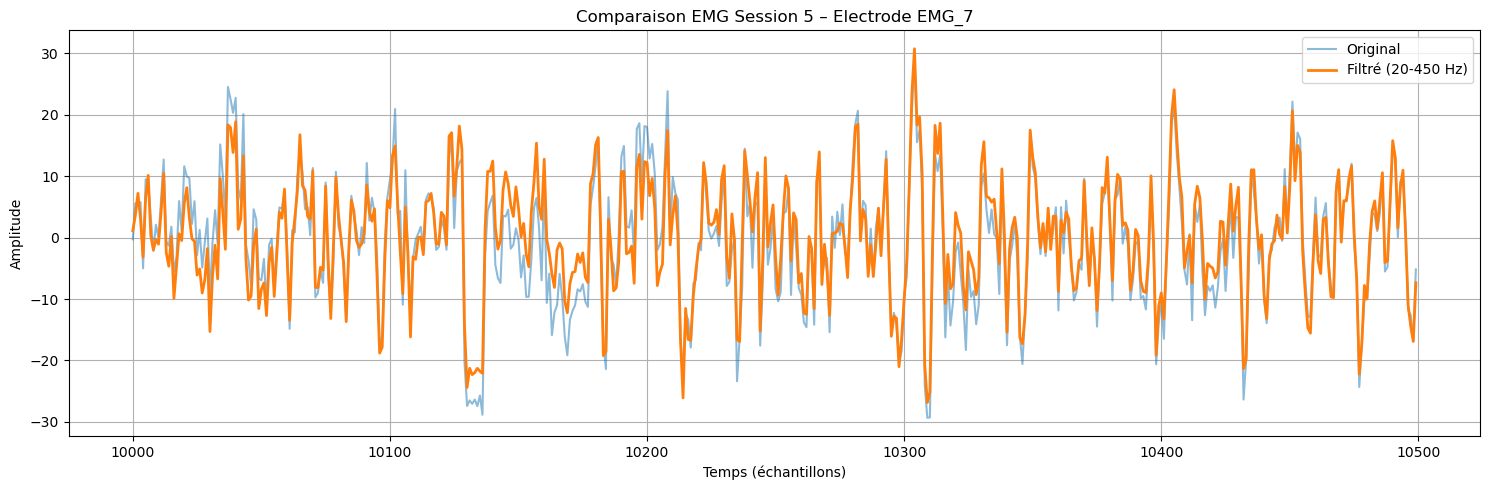

In [10]:
import matplotlib.pyplot as plt

def plot_emg_comparison(dataX, dataX_f, session_idx, electrode_idx, start=0, end=230000):
    """
    Compare l'EMG brut et filtré pour une électrode spécifique sur un intervalle donné.

    Args:
        dataX (np.ndarray): Signaux EMG bruts (shape: 5, 230000, 8)
        dataX_f (list of np.ndarray): Liste des signaux EMG filtrés (shape: 5 éléments (230000, 8))
        session_idx (int): Index de la session à utiliser (0 à 4)
        electrode_idx (int): Index de l'électrode (0 = EMG1, ..., 7 = EMG8)
        start (int): Index de début de l'intervalle temporel
        end (int): Index de fin de l'intervalle temporel
    """

    # Récupérer les signaux
    emg_original = dataX[session_idx-1, :, electrode_idx-1]
    emg_filtered = dataX_f[session_idx-1][:, electrode_idx-1]  # 🚨 ici dataX_f est une liste

    # Plot
    plt.figure(figsize=(15, 5))
    plt.plot(range(start, end), emg_original[start:end], label='Original', alpha=0.5)
    plt.plot(range(start, end), emg_filtered[start:end], label='Filtré (20-450 Hz)', linewidth=2)
    plt.title(f'Comparaison EMG Session {session_idx} – Electrode EMG_{electrode_idx}')
    plt.xlabel('Temps (échantillons)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_emg_comparison(dataX, dataX_f, 5, 7, start=10000, end=10500)

Les valeurs dans le domaine temporel sont recalculées comme des moyennes pondérées des valeurs du signal brut et du signal filtré à d’autres instants.
Cette opération est conçue pour amplifier les fréquences utiles et atténuer celles qu’on veut éliminer.

/

**ANALYSE FREQUENTIELLE FIN**

/

In [11]:
import pandas as pd
import numpy as np

def analyze_sessions(dataX, dataY):
    """
    Analyse toutes les sessions pour :
    - Missing values
    - Cohérence dimensions
    - Statistiques descriptives
    - Nombre et taux d'outliers
    """

    emg_outlier_rates = []
    joints_outlier_rates = []

    for session_idx in range(len(dataX)):
        print(f"\n===== 📊 Session {session_idx + 1} =====")

        X = dataX[session_idx]  # Shape now: (230000, 8)
        Y = dataY[session_idx]  # Shape now: (230000, 51)

        # Transformation en DataFrame (sans transpose)
        df_emg = pd.DataFrame(X, columns=[f'EMG_{i+1}' for i in range(X.shape[1])])
        df_joints = pd.DataFrame(Y, columns=[f'Joint_{i+1}' for i in range(Y.shape[1])])

        n_emg_points = df_emg.size
        n_joint_points = df_joints.size

        # 1. Missing values
        miss_X = df_emg.isnull().sum().sum()
        miss_Y = df_joints.isnull().sum().sum()
        print(f"- Missing values EMG (X) : {miss_X}")
        print(f"- Missing values Joints (Y) : {miss_Y}")

        # 2. Cohérence dimensions
        same_length = df_emg.shape[0] == df_joints.shape[0]
        print(f"- Même nombre d'échantillons X/Y ? {same_length}")

        # 3. Statistiques descriptives
        print("\n- Statistiques EMG (min, max, mean, std) :")
        print(df_emg.describe().loc[['min', 'max', 'mean', 'std']])

        print("\n- Statistiques Joints (min, max, mean, std) :")
        print(df_joints.describe().loc[['min', 'max', 'mean', 'std']])

        # 4. Nombre d'outliers
        outliers_X = 0
        for col in df_emg.columns:
            mean = df_emg[col].mean()
            std = df_emg[col].std()
            lower = mean - 3 * std
            upper = mean + 3 * std
            outliers_X += ((df_emg[col] < lower) | (df_emg[col] > upper)).sum()

        outliers_Y = 0
        for col in df_joints.columns:
            mean = df_joints[col].mean()
            std = df_joints[col].std()
            lower = mean - 3 * std
            upper = mean + 3 * std
            outliers_Y += ((df_joints[col] < lower) | (df_joints[col] > upper)).sum()

        # 5. Taux d'outliers
        emg_outlier_rate = (outliers_X / n_emg_points) * 100
        joints_outlier_rate = (outliers_Y / n_joint_points) * 100

        emg_outlier_rates.append(emg_outlier_rate)
        joints_outlier_rates.append(joints_outlier_rate)

        print(f"\n- Nombre d'outliers EMG (X) : {outliers_X} ({emg_outlier_rate:.2f}%)")
        print(f"- Nombre d'outliers Joints (Y) : {outliers_Y} ({joints_outlier_rate:.2f}%)")

        print("\n=============================")

    # Moyenne des taux sur toutes les sessions
    mean_emg_outlier_rate = np.mean(emg_outlier_rates)
    mean_joints_outlier_rate = np.mean(joints_outlier_rates)

    print("\n===== Résumé général =====")
    print(f"- Taux moyen d'outliers EMG sur 5 sessions : {mean_emg_outlier_rate:.2f}%")
    print(f"- Taux moyen d'outliers Joints sur 5 sessions : {mean_joints_outlier_rate:.2f}%")

analyze_sessions(dataX, dataY)



===== 📊 Session 1 =====
- Missing values EMG (X) : 0
- Missing values Joints (Y) : 0
- Même nombre d'échantillons X/Y ? True

- Statistiques EMG (min, max, mean, std) :
            EMG_1        EMG_2        EMG_3        EMG_4        EMG_5  \
min  -1554.971855 -2284.292653 -1350.404654 -1665.505914 -2403.124115   
max   1513.987641  2166.000630  1150.180040  1609.180369  1898.420507   
mean    -0.225202    -0.337297    -1.383354    -2.556927    -1.004465   
std     42.112715   110.864532    81.286753    74.524355    57.861790   

            EMG_6       EMG_7        EMG_8  
min  -1249.789119 -354.818142 -1305.300238  
max   1426.037613  416.506366  1224.766982  
mean    -1.159962   -0.637801     2.419252  
std     51.989688   20.314682    37.982196  

- Statistiques Joints (min, max, mean, std) :
        Joint_1    Joint_2    Joint_3    Joint_4    Joint_5    Joint_6  \
min   27.219485 -69.919595 -51.343591  26.972782 -18.275787 -22.069170   
max   45.710332 -60.723361   8.826157  31.60

To ensure data quality, we computed descriptive statistics (min, max, mean, and standard deviation) for each EMG signal and joint angle. The inspection of these statistics revealed no critical anomalies, such as flat signals, extreme outliers, or inconsistent ranges across sessions.

ANALYSE:

EMG_2 présente une activité très élevée, avec des extrêmes allant de -2284 à +2166 et une variance de plus de 12 000. Cela suggère une électrode très sensible, probablement bien positionnée et fortement sollicitée musculairement.

EMG_7 montre une activité nettement plus faible (écart-type ≈ 20, variance ≈ 400), bien en dessous des autres électrodes. Cela peut indiquer un contact sous-optimal ou une électrode peu impliquée dans les mouvements analysés.
→ Elle est conservée pour l’instant, mais devra être surveillée dans les étapes suivantes (importance des features, impact sur la prédiction).

On a 7 articulations avec une variance quasi nulle, ce qui veut dire que ces articulations n’ont pratiquement pas bougé pendant toute la session. Initially, joints 40, 41, and 42 were identified as candidates for removal due to their very low variance across most sessions, suggesting almost no movement. However, upon closer inspection, it was observed that in session 2, these joints exhibited non-negligible variance, indicating some level of activity. As a result, the decision to exclude them was reversed, and these joints were retained for model training in order to preserve potentially informative signals.

On a autour de 2700 à 3700 outliers par électrode, sur 230000 échantillons.Ce qui représente environ 1.2% à 1.6% des valeurs pour chaque électrode, ce qui est normal et acceptable pour des signaux physiologiques.

Colonnes à drop dèjà maintenant:

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_variance_histogram(variances, labels, threshold, title, xlabel):
    """
    Trace un histogramme avec couleurs et labels personnalisés, trié par ordre décroissant.

    Args:
        variances (np.ndarray): Variances
        labels (list of str): Noms des features (EMG_1, EMG_2, ..., Joint_1, ...)
        threshold (float): Seuil
        title (str): Titre du graphique
        xlabel (str): Label de l'axe X
    """
    # Trier par variance décroissante
    sorted_indices = np.argsort(variances)[::-1]
    sorted_variances = variances[sorted_indices]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_colors = ['red' if v < threshold else 'blue' for v in sorted_variances]

    plt.figure(figsize=(14,6))
    bars = plt.bar(sorted_labels, sorted_variances, color=sorted_colors)
    plt.axhline(y=threshold, color='green', linestyle='--', label=f'Seuil : {threshold:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Variance')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def analyze_and_plot_variances(dataX_session, dataY_session, threshold_emg, threshold_joints):
    """
    Analyse une session EMG + Joints : calcule variances, affiche tableau et trace histogrammes.
    """
    # --- Convertir en DataFrames
    df_emg = pd.DataFrame(dataX_session, columns=[f'EMG_{i+1}' for i in range(dataX_session.shape[1])])
    df_joints = pd.DataFrame(dataY_session, columns=[f'Joint_{i+1}' for i in range(dataY_session.shape[1])])

    # --- Calcul des variances
    emg_variances = df_emg.var()
    joints_variances = df_joints.var()

    # --- Création de DataFrames arrondis
    emg_variances_df = pd.DataFrame({
        'Electrode': emg_variances.index,
        'Variance': emg_variances.values.round(1)
    })

    joints_variances_df = pd.DataFrame({
        'Joint': joints_variances.index,
        'Variance': joints_variances.values.round(5)
    })

    # --- Affichage des tableaux sans index
    print("\n📊 Variances EMG :")
    print(emg_variances_df.to_string(index=False))

    print("\n📊 Variances Joints :")
    print(joints_variances_df.to_string(index=False))

    # --- Histogramme complet EMG
    plot_variance_histogram(
        variances=emg_variances.values,
        labels=emg_variances_df['Electrode'].tolist(),
        threshold=threshold_emg,
        title='Variance des signaux EMG (par électrode)',
        xlabel='Électrodes EMG'
    )

    # --- Histogramme complet Joints
    plot_variance_histogram(
        variances=joints_variances.values,
        labels=joints_variances_df['Joint'].tolist(),
        threshold=threshold_joints,
        title='Variance des angles articulaires (par joint)',
        xlabel='Joints'
    )

    # --- RETOURNE les résultats pour pouvoir les utiliser ensuite
    return emg_variances_df, joints_variances_df


📊 Variances EMG :
Electrode  Variance
    EMG_1    1773.5
    EMG_2   12290.9
    EMG_3    6607.5
    EMG_4    5553.9
    EMG_5    3348.0
    EMG_6    2702.9
    EMG_7     412.7
    EMG_8    1442.6

📊 Variances Joints :
   Joint   Variance
 Joint_1    8.89126
 Joint_2    1.53149
 Joint_3   82.16778
 Joint_4    0.39303
 Joint_5   27.72887
 Joint_6    7.20528
 Joint_7    0.60407
 Joint_8    0.15807
 Joint_9  165.49650
Joint_10    2.81471
Joint_11    0.22459
Joint_12  466.27924
Joint_13    0.16848
Joint_14    4.45581
Joint_15  270.72935
Joint_16    0.00122
Joint_17    0.00296
Joint_18 1289.12488
Joint_19    0.15170
Joint_20    0.05488
Joint_21  506.61505
Joint_22    0.01074
Joint_23    1.47622
Joint_24  315.94457
Joint_25    0.00169
Joint_26    0.00318
Joint_27 1434.64649
Joint_28    2.57704
Joint_29    0.82418
Joint_30  386.24476
Joint_31    0.02513
Joint_32    1.53779
Joint_33  511.34412
Joint_34    0.21064
Joint_35    0.46220
Joint_36 1720.70702
Joint_37    1.53964
Joint_38    0.61674

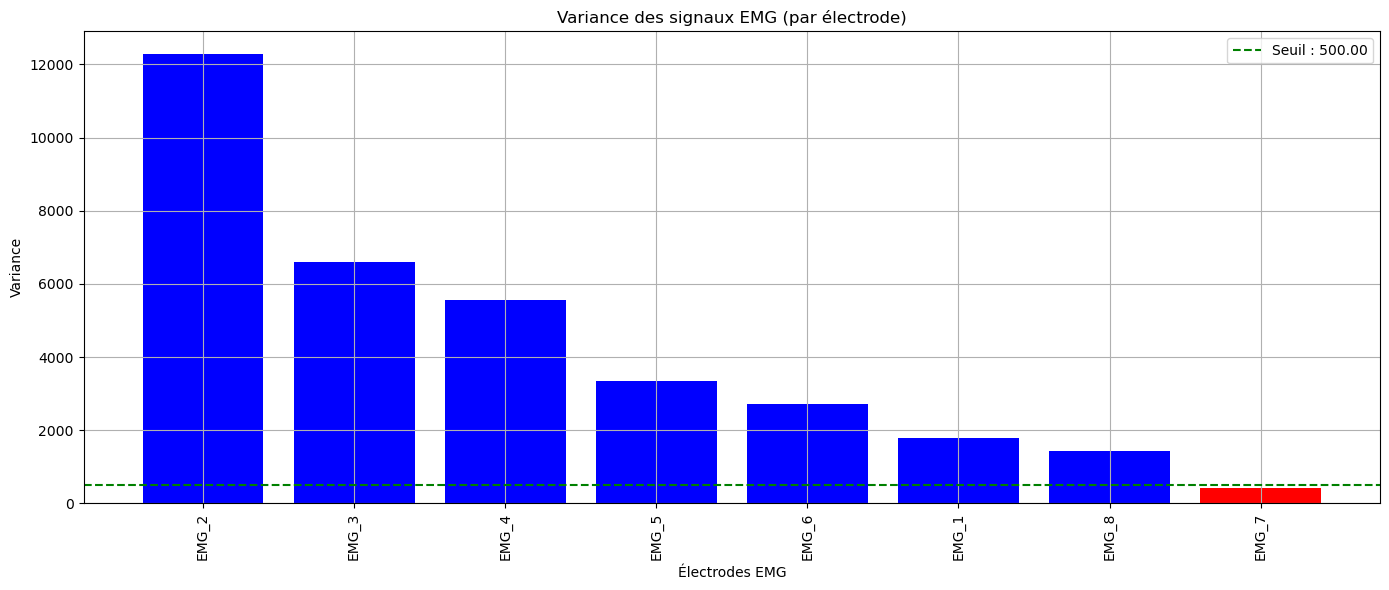

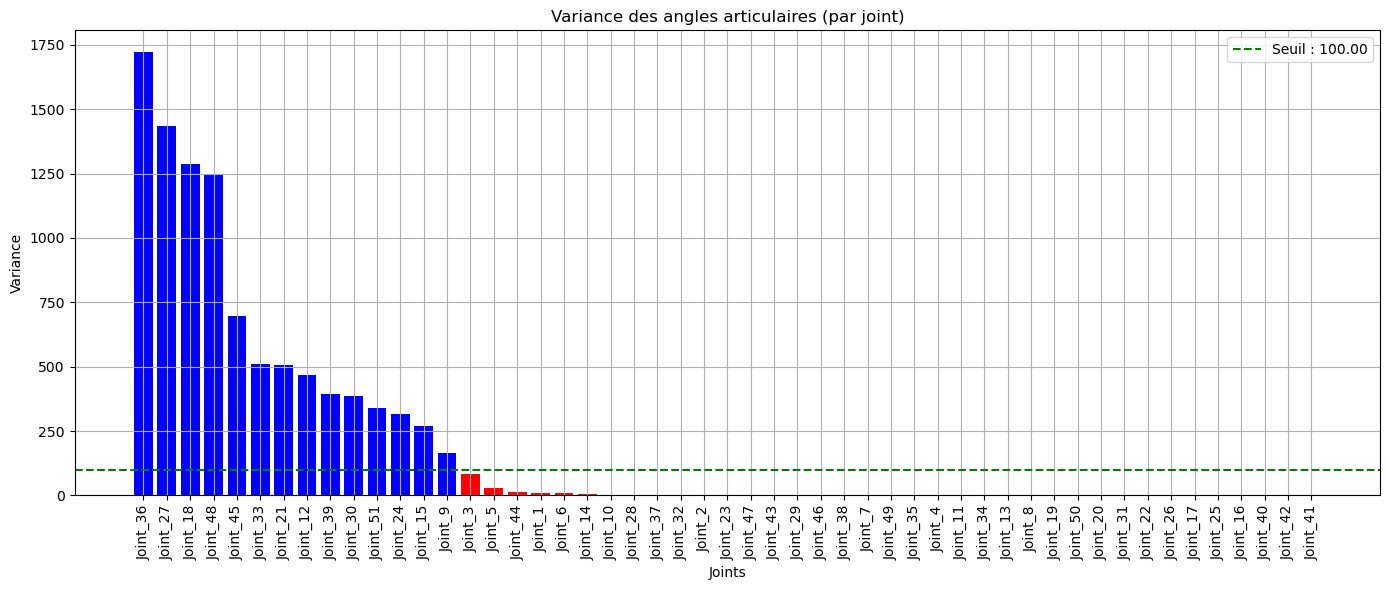

In [13]:
emg_variances_df, joints_variances_df = analyze_and_plot_variances(
    dataX_session=dataX[0],    # Exemple : session 0
    dataY_session=dataY[0],
    threshold_emg=500,
    threshold_joints=100
)

**OVERLAPPING**

Signal EMG brut (230000 x 8)

↓

Découpage en fenêtres glissantes (shape : [nb_fenêtres, 500, 8])

↓

Features extraction sur chaque fenêtre (shape : [nb_fenêtres, nb_features])

↓

Préparation des cibles (shape : [nb_fenêtres, 51])

↓

Train/test split (par exemple 80%/20% ou par session)

↓

Feature Selection (fit sur training uniquement, appliquée sur test aussi)

↓

Feature Scaling (normalisation, fit sur training uniquement)

↓

Entraînement du modèle


**Windows creation**

In [14]:
import numpy as np

def create_windows_and_targets(emg_df, joints_df, window_size, stride, target_position='end'):
    X_windows = []
    y_targets = []
    indices = []

    num_samples = emg_df.shape[0]
    num_windows = (num_samples - window_size) // stride + 1

    for i in range(0, num_samples - window_size + 1, stride):
        window_x = emg_df.iloc[i:i+window_size].values
        X_windows.append(window_x)

        # Cible Y à la position souhaitée
        if target_position == 'center':
            target_idx = i + window_size // 2
        elif target_position == 'end':
            target_idx = i + window_size - 1
        else:
            raise ValueError("target_position must be 'center' or 'end'")

        y_targets.append(joints_df.iloc[target_idx].values)
        indices.append(i)

    X_windows = np.array(X_windows)        # shape: (n_windows, 500, 8)
    y_targets = np.array(y_targets)        # shape: (n_windows, nb_joints)

    print(f"Création de {X_windows.shape[0]} fenêtres.")
    print(f"Création de {y_targets.shape[0]} targets.")
    return X_windows, y_targets, indices

TEST

In [15]:
X_windows, y_windows, win_indices = create_windows_and_targets(
    emg_df=df_emg,
    joints_df=df_joints,
    window_size=500,
    stride=100,
    target_position='end'  # ou 'center'
)

# Vérification de l'overlap : la ligne 320 de la fenêtre 87 doit être la même que la ligne 220 de la fenêtre 88
fenetre_87 = X_windows[87]
fenetre_88 = X_windows[88]

match = np.allclose(fenetre_87[320], fenetre_88[220])
print(f"Vérification d'overlap entre fenêtre 87[320] et 88[220] : {'✅ Identiques' if match else '❌ Différentes'}")

Création de 2296 fenêtres.
Création de 2296 targets.
Vérification d'overlap entre fenêtre 87[320] et 88[220] : ✅ Identiques


In [16]:
print(X_windows.shape)  # (n_windows, 500, 8)

(2296, 500, 8)


**Features extraction from every windows**

In [17]:
def extract_emg_features(X_windows, mpr_threshold=0.01):
    feature_list = []

    for window in X_windows:  # shape: (500, 8)
        features = []
        for i in range(window.shape[1]):  # pour chaque électrode
            x = window[:, i]

            mav = np.mean(np.abs(x))
            rms = np.sqrt(np.mean(x ** 2))
            var = np.var(x)
            std = np.std(x)
            zc = np.sum(np.diff(np.sign(x)) != 0)
            mpr = np.sum(np.abs(x) > mpr_threshold) / len(x)

            features.extend([mav, rms, var, std, zc, mpr])
        feature_list.append(features)

    return np.array(feature_list)  # shape: (n_windows, 6 * 8)

In addition to standard time-domain features, additional descriptors such as waveform length and Willison amplitude were extracted to better characterize muscle activation patterns. Feature correlation analysis was also performed to identify and potentially remove redundant information

In [18]:
import numpy as np
from scipy.stats import skew, kurtosis

def extract_emg_features_bis(X_windows, mpr_threshold=0.01, wamp_threshold=0.01):
    """
    Extraction avancée des features EMG à partir de fenêtres.

    Parameters:
    - X_windows: np.array (n_windows, 500, 8)
    - mpr_threshold: seuil pour Myopulse Rate
    - wamp_threshold: seuil pour Willison Amplitude

    Returns:
    - feature_array: np.array (n_windows, 10 * 8)
    """
    feature_list = []

    for window in X_windows:  # (500, 8)
        features = []
        for i in range(window.shape[1]):  # pour chaque électrode
            x = window[:, i]

            # --- Features classiques ---
            mav = np.mean(np.abs(x))
            rms = np.sqrt(np.mean(x ** 2))
            var = np.var(x)
            std = np.std(x)
            zc = np.sum(np.diff(np.sign(x)) != 0)
            mpr = np.sum(np.abs(x) > mpr_threshold) / len(x)

            # --- Nouvelles features ---
            wl = np.sum(np.abs(np.diff(x)))  # Waveform Length
            wamp = np.sum(np.abs(np.diff(x)) > wamp_threshold)  # Willison Amplitude
            skewness = skew(x)
            kurt = kurtosis(x)

            # Ajouter toutes les features
            features.extend([mav, rms, var, std, zc, mpr, wl, wamp, skewness, kurt])

        feature_list.append(features)

    return np.array(feature_list)  # shape: (n_windows, 10 * 8)

PyRieman

In [46]:
x = []
y = [1, 2, 3, 4, 5]
z= [6, 7, 8, 9, 10]
x.append(y)
x.extend(z)
print(x)

[[1, 2, 3, 4, 5], 6, 7, 8, 9, 10]


In [44]:
x = pd.DataFrame(X_windows[0])
x = x.to_numpy()
print(x)

[[-12.08275273  -6.59006793   7.82053099 ...   7.38537066  14.08211781
   -8.25812928]
 [ -4.93135392  -0.49787699   5.67278212 ...   8.01773482   3.24123776
   -6.54599038]
 [  7.49453626  -5.81376831  -1.80661116 ...   4.57003122  -2.14389303
    8.37479077]
 ...
 [ -3.26123033  -5.03787595   0.24153304 ...  13.94736389  58.11268029
    2.88228651]
 [  3.0455641   -7.53302007  -2.64231971 ...  16.70854576  68.0090809
   -3.99262356]
 [ -2.56140669  -7.30919713   7.59565188 ...  19.0566729   68.4659209
   11.22019517]]


Tu vois encore que X_windows a la forme (n_windows, 500, 8), alors que PyRiemann veut (n_windows, 8, 500).

In [19]:
import numpy as np
import itertools

def get_top_emg_relations(X_windows, top_k=20):
    """
    Classement des relations EMG les plus fortes basées sur la covariance.

    Args:
        X_windows (np.ndarray): shape (n_windows, 8, 500) (attention : bien (n_windows, electrodes, time))
        top_k (int): nombre de paires à afficher

    Returns:
        List of tuples: (electrode_i, electrode_j, moyenne_covariance)
    """

    # --- 1. Estimation de toutes les matrices de covariance
    covmats = [np.cov(window) for window in X_windows]  # chaque window donne (8,8)
    covmats = np.array(covmats)  # (n_windows, 8, 8)

    # --- 2. Moyenne des covariances sur toutes les fenêtres
    mean_cov = np.mean(covmats, axis=0)  # (8, 8)

    # --- 3. Stocker les paires (i, j) + valeur
    relations = []
    for i, j in itertools.combinations(range(8), 2):  # que i < j pour éviter doublons
        value = mean_cov[i, j]
        relations.append((i, j, value))

    # --- 4. Trier par valeur absolue décroissante
    relations_sorted = sorted(relations, key=lambda x: abs(x[2]), reverse=True)

    # --- 5. Retourner les top_k
    return relations_sorted[:top_k]


In [20]:
# Suppose que tu as déjà X_windows prêt (n_windows, 8, 500)
X_windows = np.transpose(X_windows, (0, 2, 1))  # (n_windows, 8, 500)
top_relations = get_top_emg_relations(X_windows, top_k=20)

for idx, (i, j, value) in enumerate(top_relations):
    print(f"{idx+1:2d}. Electrode {i} - Electrode {j} : covariance moyenne = {value:.4f}")


 1. Electrode 1 - Electrode 2 : covariance moyenne = -2466.7912
 2. Electrode 1 - Electrode 3 : covariance moyenne = -2197.3150
 3. Electrode 4 - Electrode 5 : covariance moyenne = 729.2478
 4. Electrode 4 - Electrode 7 : covariance moyenne = -613.3884
 5. Electrode 2 - Electrode 3 : covariance moyenne = 602.4224
 6. Electrode 0 - Electrode 2 : covariance moyenne = 596.8275
 7. Electrode 5 - Electrode 6 : covariance moyenne = 522.6403
 8. Electrode 4 - Electrode 6 : covariance moyenne = 289.1314
 9. Electrode 3 - Electrode 7 : covariance moyenne = 275.6580
10. Electrode 0 - Electrode 3 : covariance moyenne = 257.7253
11. Electrode 0 - Electrode 1 : covariance moyenne = 254.6313
12. Electrode 2 - Electrode 7 : covariance moyenne = 248.2055
13. Electrode 2 - Electrode 6 : covariance moyenne = 223.0415
14. Electrode 3 - Electrode 6 : covariance moyenne = 171.0019
15. Electrode 0 - Electrode 4 : covariance moyenne = -157.2942
16. Electrode 1 - Electrode 5 : covariance moyenne = 150.0147
17

In [21]:
import numpy as np
import itertools

def get_top_emg_correlations(X_windows, top_k=20):
    """
    Classement des relations EMG les plus fortes basées sur la corrélation de Pearson.

    Args:
        X_windows (np.ndarray): shape (n_windows, 8, 500)
        top_k (int): nombre de paires à afficher

    Returns:
        List of tuples: (electrode_i, electrode_j, correlation_moyenne)
    """

    # --- 1. Calculer les matrices de corrélation sur chaque fenêtre
    corrmats = [np.corrcoef(window) for window in X_windows]  # (8, 8) pour chaque fenêtre
    corrmats = np.array(corrmats)  # (n_windows, 8, 8)

    # --- 2. Moyenne des corrélations sur toutes les fenêtres
    mean_corr = np.mean(corrmats, axis=0)  # (8, 8)

    # --- 3. Extraire toutes les paires uniques (i, j) sans doublons
    relations = []
    for i, j in itertools.combinations(range(8), 2):
        value = mean_corr[i, j]
        relations.append((i, j, value))

    # --- 4. Trier par valeur absolue décroissante
    relations_sorted = sorted(relations, key=lambda x: abs(x[2]), reverse=True)

    # --- 5. Retourner les top_k
    return relations_sorted[:top_k]


In [22]:
# Suppose que tu as X_windows bien formaté (n_windows, 8, 500)
X_windows = np.transpose(X_windows, (0, 2, 1))  # (n_windows, 8, 500)
top_relations = get_top_emg_correlations(X_windows, top_k=10)

for idx, (i, j, value) in enumerate(top_relations):
    print(f"{idx+1:2d}. Electrode {i} - Electrode {j} : corrélation moyenne = {value:.4f}")


 1. Electrode 6 - Electrode 7 : corrélation moyenne = 0.7577
 2. Electrode 1 - Electrode 2 : corrélation moyenne = 0.7571
 3. Electrode 5 - Electrode 6 : corrélation moyenne = 0.7512
 4. Electrode 2 - Electrode 3 : corrélation moyenne = 0.7508
 5. Electrode 4 - Electrode 5 : corrélation moyenne = 0.7484
 6. Electrode 0 - Electrode 1 : corrélation moyenne = 0.7447
 7. Electrode 3 - Electrode 4 : corrélation moyenne = 0.7421
 8. Electrode 5 - Electrode 7 : corrélation moyenne = 0.4076
 9. Electrode 1 - Electrode 3 : corrélation moyenne = 0.4063
10. Electrode 0 - Electrode 2 : corrélation moyenne = 0.4014


In [23]:
#pip install pyriemann

In [24]:
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
import numpy as np

def extract_spatial_features(X_windows):
    """
    Extraction de features spatiales via Pyriemann (covariances + espace tangent).

    Args:
        X_windows (np.ndarray): (n_windows, window_size, n_electrodes)

    Returns:
        features (np.ndarray): (n_windows, n_spatial_features)
    """

    # --- Transposer pour avoir (n_windows, n_electrodes, window_size)
    X_windows = np.transpose(X_windows, (0, 2, 1))  # (n_windows, 8, 500)

    # --- Estimation des matrices de covariance
    covmats = Covariances(estimator='oas').transform(X_windows)  # (n_windows, 8, 8)

    # --- Passage dans l'espace tangent
    ts = TangentSpace()
    spatial_features = ts.fit_transform(covmats)  # (n_windows, 36)

    # --- Retour standard sous np.array
    return np.array(spatial_features)  # (n_windows, 36)


EXTRACT EVERYTHING

In [25]:
def extract_everything(X_windows, mpr_threshold=0.01, wamp_threshold=0.01):
    """
    Extraction combinée : features EMG classiques + features spatiales Pyriemann.

    Args:
        X_windows (np.ndarray): (n_windows, 500, 8)

    Returns:
        features (np.ndarray): (n_windows, total_features)
    """

    # --- 1. Extraire features classiques
    features_classic = extract_emg_features_bis(X_windows, mpr_threshold, wamp_threshold)
    # shape: (n_windows, 80)

    # --- 2. Extraire features spatiales
    features_spatial = extract_spatial_features(X_windows)
    # shape: (n_windows, 36)

    # --- 3. Concaténer toutes les features
    features_combined = np.hstack((features_classic, features_spatial))
    # shape: (n_windows, 116)

    # --- 4. Retour sous np.array (même style que tes autres fonctions)
    return np.array(features_combined)  # (n_windows, 116)


Données finales

In [26]:
import numpy as np
import pandas as pd

def prepare_data(dataX, dataY, feature_extraction_function, window_size=500, stride=100, target_position='end'):
    """
    Prépare les données en découpant les signaux, extrayant les features, et associant les cibles.

    Parameters:
    - dataX: liste des signaux EMG bruts pour chaque session
    - dataY: liste des cibles joints pour chaque session
    - feature_extraction_function: fonction d'extraction de features à appliquer
    - window_size: taille de la fenêtre (par défaut 500)
    - stride: pas entre les fenêtres (par défaut 100)
    - target_position: position de la cible ('start', 'center', 'end')

    Returns:
    - X_train: np.array (n_windows_total, n_features)
    - Y_train: np.array (n_windows_total, 51)
    """
    all_X = []
    all_Y = []

    for session_idx in range(len(dataX)):
        print(f"📂 Traitement de la session {session_idx + 1}...")

        # 1. Données EMG
        df_emg = pd.DataFrame(dataX[session_idx], columns=[f'EMG_{i+1}' for i in range(8)])

        # 2. Données Joints
        df_joints = pd.DataFrame(dataY[session_idx], columns=[f'Joint_{i+1}' for i in range(51)])

        # 3. Découpage en fenêtres et association cible
        X_windows, y_windows, _ = create_windows_and_targets(
            emg_df=df_emg,
            joints_df=df_joints,
            window_size=window_size,
            stride=stride,
            target_position=target_position
        )

        # 4. Extraction des features
        X_features = feature_extraction_function(X_windows)

        # 5. Concaténation globale
        all_X.append(X_features)
        all_Y.append(y_windows)

    # Fusion de toutes les sessions
    X_train = np.vstack(all_X)
    Y_train = np.vstack(all_Y)

    print(f"✅ X_train shape: {X_train.shape}")
    print(f"✅ Y_train shape: {Y_train.shape}")

    return X_train, Y_train

In [27]:
#X_train, Y_train= prepare_data(dataX, dataY, extract_emg_features) #A1
#X_train, Y_train= prepare_data(dataX, dataY, extract_emg_features_bis) #A2
#X_train, Y_train= prepare_data(dataX, dataY, extract_spatial_features)
X_train, Y_train= prepare_data(dataX, dataY, extract_everything)

#X_train, Y_train= prepare_data(dataX_f, dataY, extract_emg_features)

📂 Traitement de la session 1...
Création de 2296 fenêtres.
Création de 2296 targets.
📂 Traitement de la session 2...
Création de 2296 fenêtres.
Création de 2296 targets.
📂 Traitement de la session 3...
Création de 2296 fenêtres.
Création de 2296 targets.
📂 Traitement de la session 4...
Création de 2296 fenêtres.
Création de 2296 targets.
📂 Traitement de la session 5...
Création de 2296 fenêtres.
Création de 2296 targets.
✅ X_train shape: (11480, 116)
✅ Y_train shape: (11480, 51)


Drop les colonnes avec variance nulle

In [28]:
import numpy as np
import pandas as pd

def drop_null_variance_targets(X_train, Y_train, verbose=True):
    """
    Supprime les colonnes de Y_train ayant variance nulle et ajuste X_train si besoin.

    Args:
        X_train (np.ndarray): Features
        Y_train (np.ndarray): Targets
        verbose (bool): Afficher les colonnes supprimées ou pas

    Returns:
        X_train_clean (np.ndarray): Features (inchangé ici)
        Y_train_clean (np.ndarray): Targets sans colonnes à variance nulle
        dropped_cols_idx (list): Liste des indices de colonnes supprimées
    """

    # 1. Calcul de la variance par colonne
    variances = np.var(Y_train, axis=0)

    # 2. Identifier les colonnes à variance nulle
    cols_to_drop = np.where(variances < 0.0001)[0].tolist()

    if verbose:
        if cols_to_drop:
            print(f"🧹 Colonnes de Y_train supprimées (variance nulle) : {cols_to_drop}")
        else:
            print("✅ Aucune colonne de Y_train supprimée (toutes ont une variance > 0)")

    # 3. Supprimer les colonnes nulles
    Y_train_clean = np.delete(Y_train, cols_to_drop, axis=1)

    return X_train, Y_train_clean, cols_to_drop

In [29]:
X_train_0var, Y_train_0var, dropped_cols_idx = drop_null_variance_targets(X_train, Y_train)

🧹 Colonnes de Y_train supprimées (variance nulle) : [39, 40, 41]


Split

In [30]:
from sklearn.model_selection import train_test_split

# Split 80% train, 20% test
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train_0var, Y_train_0var, test_size=0.2, random_state=42)

print("X_train split shape:", X_tr.shape)
print("X_test split shape:", X_val.shape)
print("Y_train split shape:", Y_tr.shape)
print("Y_test split shape:", Y_val.shape)
print(X_tr[0,0]) #Normalement on doit avoir 12.049405622566683

X_train split shape: (9184, 116)
X_test split shape: (2296, 116)
Y_train split shape: (9184, 48)
Y_test split shape: (2296, 48)
12.049405622566683


Linear regression

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train
model = LinearRegression()
model.fit(X_tr, Y_tr)

# Predict
Y_pred = model.predict(X_val)

# Corrected evaluation
mse = mean_squared_error(Y_val, Y_pred, multioutput='raw_values')
mae = mean_absolute_error(Y_val, Y_pred, multioutput='raw_values')
r2 = r2_score(Y_val, Y_pred, multioutput='raw_values')
var_Y = np.var(Y_val, axis=0)
nmse = mse / var_Y

print("Métriques sur l'ensemble de validation :")
for i in range(Y_val.shape[1]):
    print(f"Sortie {i+1:02d} - MSE: {mse[i]:.4f}, MAE: {mae[i]:.4f}, R2: {r2[i]:.4f}, NMSE: {nmse[i]:.4f}")

print(f"\nMoyennes - MSE: {np.mean(mse):.4f}, MAE: {np.mean(mae):.4f}, R2: {np.mean(r2):.4f}, NMSE: {np.mean(nmse):.4f}")

# A1 Moyennes - MSE: 44.6422, MAE: 2.8317, R2: 0.6755, NMSE: 0.3245
# A2 Moyennes - MSE: 42.0387, MAE: 2.7361, R2: 0.6904, NMSE: 0.3096
# B1 Moyennes - MSE: 45.2332, MAE: 2.8332, R2: 0.6734, NMSE: 0.3266
# B2 Moyennes - MSE: 42.6705, MAE: 2.7363, R2: 0.6888, NMSE: 0.3112

Métriques sur l'ensemble de validation :
Sortie 01 - MSE: 2.1016, MAE: 1.0692, R2: 0.8265, NMSE: 0.1735
Sortie 02 - MSE: 0.3748, MAE: 0.3980, R2: 0.8272, NMSE: 0.1728
Sortie 03 - MSE: 19.0201, MAE: 3.1711, R2: 0.8319, NMSE: 0.1681
Sortie 04 - MSE: 0.1092, MAE: 0.2378, R2: 0.6297, NMSE: 0.3703
Sortie 05 - MSE: 9.5745, MAE: 2.3313, R2: 0.6200, NMSE: 0.3800
Sortie 06 - MSE: 2.5177, MAE: 1.1966, R2: 0.6189, NMSE: 0.3811
Sortie 07 - MSE: 0.0924, MAE: 0.2324, R2: 0.8361, NMSE: 0.1639
Sortie 08 - MSE: 0.0165, MAE: 0.0915, R2: 0.8644, NMSE: 0.1356
Sortie 09 - MSE: 23.4157, MAE: 3.6719, R2: 0.8426, NMSE: 0.1574
Sortie 10 - MSE: 0.3757, MAE: 0.4553, R2: 0.8742, NMSE: 0.1258
Sortie 11 - MSE: 0.0547, MAE: 0.1693, R2: 0.7949, NMSE: 0.2051
Sortie 12 - MSE: 64.4601, MAE: 5.9386, R2: 0.8723, NMSE: 0.1277
Sortie 13 - MSE: 0.0435, MAE: 0.1537, R2: 0.8117, NMSE: 0.1883
Sortie 14 - MSE: 2.9434, MAE: 1.2834, R2: 0.4641, NMSE: 0.5359
Sortie 15 - MSE: 68.3814, MAE: 6.1382, R2: 0.7813, NMSE: 0.2187
Sortie 16 

Linear regression + cross val

In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Suppose que X_tr, Y_tr existent (après ton split)

# 1. Créer le modèle
base_model = LinearRegression()
model = MultiOutputRegressor(base_model)

# 2. Définir les scorers custom
def mse_multioutput(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def mae_multioutput(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def r2_multioutput(y_true, y_pred):
    return r2_score(y_true, y_pred)

scoring = {
    'MSE': make_scorer(mse_multioutput, greater_is_better=False),
    'MAE': make_scorer(mae_multioutput, greater_is_better=False),
    'R2': make_scorer(r2_multioutput)
}

# 3. Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model, X_tr, Y_tr, cv=cv, scoring=scoring)

# 4. Résultats
mse_cv = -cv_results['test_MSE']
mae_cv = -cv_results['test_MAE']
r2_cv = cv_results['test_R2']

print("\nCross-validation 5-fold :")
print(f"MSE CV moyen: {np.mean(mse_cv):.4f} ± {np.std(mse_cv):.4f}")
print(f"MAE CV moyen: {np.mean(mae_cv):.4f} ± {np.std(mae_cv):.4f}")
print(f"R2 CV moyen: {np.mean(r2_cv):.4f} ± {np.std(r2_cv):.4f}")



Cross-validation 5-fold :
MSE CV moyen: 34.8890 ± 0.8313
MAE CV moyen: 2.5758 ± 0.0194
R2 CV moyen: 0.7764 ± 0.0058


Normalisation + PCA

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

def prepare_data_with_pca(X_train, X_val, use_pca, n_components=30, plot_variance=False):
    """
    Normalisation + option PCA.

    Parameters:
    - X_train: np.array (features train)
    - X_val: np.array (features validation)
    - use_pca: bool, si True applique PCA en plus de la normalisation
    - n_components: nombre de composantes principales à conserver (si use_pca=True)

    Returns:
    - X_train_processed: np.array (train après normalisation + PCA si activé)
    - X_val_processed: np.array (test après normalisation + PCA si activé)
    - scaler: StandardScaler fit sur X_train
    - pca: PCA fit sur X_train (si PCA est utilisé)
    """
    # 1. Normalisation (toujours)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    if use_pca:
        # 2. PCA si demandé
        pca = PCA(n_components=n_components)
        X_train_processed = pca.fit_transform(X_train_scaled)
        X_val_processed = pca.transform(X_val_scaled)

        # 3. Visualisation de la variance expliquée
        if plot_variance:
            plt.figure(figsize=(8,5))
            plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
            plt.title('Variance cumulée expliquée par les composantes principales')
            plt.xlabel('Nombre de composantes principales')
            plt.ylabel('Variance expliquée cumulée')
            plt.grid()
            plt.show()
        return X_train_processed, X_val_processed #, scaler, pca
    else:
        # Si pas de PCA, juste la normalisation
        return X_train_scaled, X_val_scaled #, scaler, None

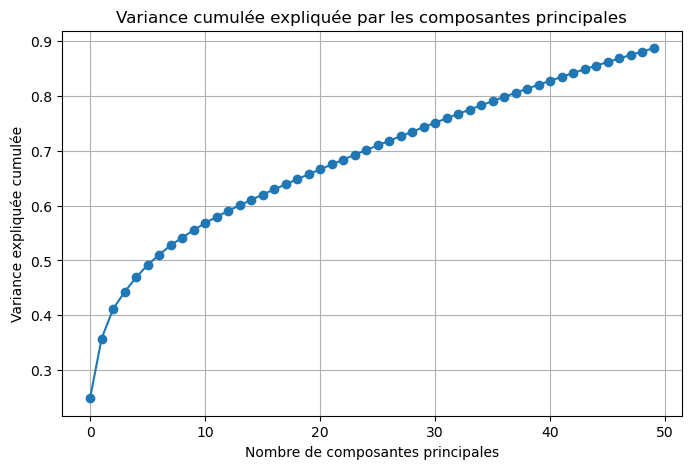

In [34]:
X_tr_processed, X_val_processed = prepare_data_with_pca(X_tr, X_val, use_pca=False, n_components=50, plot_variance=True)
X_tr_pca, X_val_pca = prepare_data_with_pca(X_tr, X_val, use_pca=True, n_components=50, plot_variance=True)

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train
model = LinearRegression()
model.fit(X_tr_pca, Y_tr)

# Predict
Y_pred = model.predict(X_val_pca)

# Corrected evaluation
mse = mean_squared_error(Y_val, Y_pred, multioutput='raw_values')
mae = mean_absolute_error(Y_val, Y_pred, multioutput='raw_values')
r2 = r2_score(Y_val, Y_pred, multioutput='raw_values')
var_Y = np.var(Y_val, axis=0)
nmse = mse / var_Y

print("Métriques sur l'ensemble de validation :")
for i in range(Y_val.shape[1]):
    print(f"Sortie {i+1:02d} - MSE: {mse[i]:.4f}, MAE: {mae[i]:.4f}, R2: {r2[i]:.4f}, NMSE: {nmse[i]:.4f}")

print(f"\nMoyennes - MSE: {np.mean(mse):.4f}, MAE: {np.mean(mae):.4f}, R2: {np.mean(r2):.4f}, NMSE: {np.mean(nmse):.4f}")

Métriques sur l'ensemble de validation :
Sortie 01 - MSE: 3.0304, MAE: 1.2995, R2: 0.7498, NMSE: 0.2502
Sortie 02 - MSE: 0.5218, MAE: 0.4727, R2: 0.7594, NMSE: 0.2406
Sortie 03 - MSE: 27.4287, MAE: 3.8516, R2: 0.7575, NMSE: 0.2425
Sortie 04 - MSE: 0.1354, MAE: 0.2644, R2: 0.5406, NMSE: 0.4594
Sortie 05 - MSE: 12.2898, MAE: 2.6099, R2: 0.5122, NMSE: 0.4878
Sortie 06 - MSE: 3.2353, MAE: 1.3398, R2: 0.5103, NMSE: 0.4897
Sortie 07 - MSE: 0.1423, MAE: 0.2875, R2: 0.7474, NMSE: 0.2526
Sortie 08 - MSE: 0.0259, MAE: 0.1179, R2: 0.7878, NMSE: 0.2122
Sortie 09 - MSE: 36.2240, MAE: 4.5688, R2: 0.7564, NMSE: 0.2436
Sortie 10 - MSE: 0.6174, MAE: 0.5912, R2: 0.7932, NMSE: 0.2068
Sortie 11 - MSE: 0.0795, MAE: 0.2055, R2: 0.7019, NMSE: 0.2981
Sortie 12 - MSE: 105.9421, MAE: 7.7071, R2: 0.7901, NMSE: 0.2099
Sortie 13 - MSE: 0.0839, MAE: 0.2156, R2: 0.6365, NMSE: 0.3635
Sortie 14 - MSE: 3.5148, MAE: 1.4041, R2: 0.3601, NMSE: 0.6399
Sortie 15 - MSE: 130.6185, MAE: 8.4055, R2: 0.5823, NMSE: 0.4177
Sortie 

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def run_pca_evaluation(X_tr, Y_tr, X_val, Y_val, pc_list):
    """
    Évalue un modèle linéaire pour plusieurs valeurs de composantes principales PCA.

    Args:
        X_tr (np.ndarray): Données d'entraînement
        Y_tr (np.ndarray): Cibles d'entraînement
        X_val (np.ndarray): Données de validation
        Y_val (np.ndarray): Cibles de validation
        pc_list (list): Liste des nombres de composantes principales à tester

    Returns:
        results (pd.DataFrame): Résumé des résultats
    """
    results = []

    # Normalisation des données
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_val_scaled = scaler.transform(X_val)

    for n_components in pc_list:
        pca = PCA(n_components=n_components)
        X_tr_pca = pca.fit_transform(X_tr_scaled)
        X_val_pca = pca.transform(X_val_scaled)

        model = LinearRegression()
        model.fit(X_tr_pca, Y_tr)

        Y_pred = model.predict(X_val_pca)

        mse = mean_squared_error(Y_val, Y_pred, multioutput='raw_values')
        mae = mean_absolute_error(Y_val, Y_pred, multioutput='raw_values')
        r2 = r2_score(Y_val, Y_pred, multioutput='raw_values')
        var_Y = np.var(Y_val, axis=0)
        nmse = mse / var_Y

        results.append({
            "PC": n_components,
            "Var explained (%)": round(np.sum(pca.explained_variance_ratio_) * 100, 1),
            "MSE": round(np.mean(mse), 4),
            "MAE": round(np.mean(mae), 4),
            "R2": round(np.mean(r2), 4),
            "NMSE": round(np.mean(nmse), 4)
        })

    return pd.DataFrame(results)


pc_list = [30, 40, 50, 60, 70, 80]
results_df = run_pca_evaluation(X_tr, Y_tr, X_val, Y_val, pc_list)
print(results_df.to_string(index=False))


 PC  Var explained (%)     MSE    MAE     R2   NMSE
 30               74.3 64.8610 3.4480 0.6391 0.3609
 40               82.0 63.7942 3.4334 0.6443 0.3557
 50               88.7 61.7796 3.3889 0.6524 0.3476
 60               93.9 58.1768 3.3050 0.6678 0.3322
 70               97.6 51.9044 3.1418 0.6924 0.3076
 80               99.5 42.0834 2.8178 0.7332 0.2668


In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# 1. Créer le modèle
base_model = LinearRegression()
model = MultiOutputRegressor(base_model)

# 2. Définir les scorers custom
def mse_multioutput(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def mae_multioutput(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def r2_multioutput(y_true, y_pred):
    return r2_score(y_true, y_pred)

scoring = {
    'MSE': make_scorer(mse_multioutput, greater_is_better=False),
    'MAE': make_scorer(mae_multioutput, greater_is_better=False),
    'R2': make_scorer(r2_multioutput)
}

# 3. Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model, X_tr, Y_tr, cv=cv, scoring=scoring)

# 4. Résultats
mse_cv = -cv_results['test_MSE']
mae_cv = -cv_results['test_MAE']
r2_cv = cv_results['test_R2']

print("\nCross-validation 5-fold :")
print(f"MSE CV moyen: {np.mean(mse_cv):.4f} ± {np.std(mse_cv):.4f}")
print(f"MAE CV moyen: {np.mean(mae_cv):.4f} ± {np.std(mae_cv):.4f}")
print(f"R2 CV moyen: {np.mean(r2_cv):.4f} ± {np.std(r2_cv):.4f}")



Cross-validation 5-fold :
MSE CV moyen: 34.8890 ± 0.8313
MAE CV moyen: 2.5758 ± 0.0194
R2 CV moyen: 0.7764 ± 0.0058


Fully connected Neural networks

In [41]:
!pip install torch

   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 2.1/212.5 MB 10.7 MB/s eta 0:00:20
    --------------------------------------- 4.2/212.5 MB 10.1 MB/s eta 0:00:21
   - -------------------------------------- 5.5/212.5 MB 8.8 MB/s eta 0:00:24
   - -------------------------------------- 7.1/212.5 MB 8.6 MB/s eta 0:00:25
   - -------------------------------------- 9.2/212.5 MB 8.6 MB/s eta 0:00:24
   -- ------------------------------------- 11.3/212.5 MB 9.0 MB/s eta 0:00:23
   -- ------------------------------------- 13.9/212.5 MB 9.4 MB/s eta 0:00:22
   --- ------------------------------------ 16.3/212.5 MB 9.6 MB/s eta 0:00:21
   --- ------------------------------------ 18.4/212.5 MB 9.6 MB/s eta 0:00:21
   --- ------------------------------------ 20.4/212.5 MB 9.7 MB/s eta 0:00:20
   ---- ----------------------------------- 22.8/212.5 MB 9.8 MB/s eta 0:00:20
   ---- ----------------------------------- 24.9/212.5 MB 9.9 M

In [38]:
import torch
import torch.nn as nn

class FCNDenseRegressor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FCNDenseRegressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.model(x)

ModuleNotFoundError: No module named 'torch'

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Conversion en tenseurs PyTorch
X_train_torch = torch.tensor(X_tr_processed, dtype=torch.float32)
Y_train_torch = torch.tensor(Y_tr, dtype=torch.float32)
X_val_torch = torch.tensor(X_val_processed, dtype=torch.float32)
Y_val_torch = torch.tensor(Y_val, dtype=torch.float32)

# Instanciation du modèle
model = FCNDenseRegressor(input_dim=X_tr.shape[1], output_dim=Y_tr.shape[1])

# Entraînement PyTorch normal
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002, weight_decay=1e-4)

batch_size = 64

train_dataset = TensorDataset(X_train_torch, Y_train_torch)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
epochs = 100
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

for epoch in range(epochs):
    model.train()
    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        Y_pred_batch = model(X_batch)
        loss = criterion(Y_pred_batch, Y_batch)
        loss.backward()
        optimizer.step()

    scheduler.step()  # Reduce LR every 30 epochs

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mise en mode évaluation
model.eval()

# Désactiver le calcul du gradient
with torch.no_grad():
    Y_pred_val_torch = model(X_val_torch)

# Conversion en numpy pour les métriques scikit-learn
Y_pred_val = Y_pred_val_torch.cpu().numpy()
Y_val_np = Y_val_torch.cpu().numpy()

# Calcul des métriques
mse = mean_squared_error(Y_val_np, Y_pred_val, multioutput='raw_values')
mae = mean_absolute_error(Y_val_np, Y_pred_val, multioutput='raw_values')
r2 = r2_score(Y_val_np, Y_pred_val, multioutput='raw_values')
var_Y = np.var(Y_val_np, axis=0)
nmse = mse / var_Y

# Affichage
print("\n📊 Évaluation sur l'ensemble de validation :")
for i in range(Y_val_np.shape[1]):
    print(f"Sortie {i+1:02d} - MSE: {mse[i]:.4f}, MAE: {mae[i]:.4f}, R2: {r2[i]:.4f}, NMSE: {nmse[i]:.4f}")

print(f"\n🎯 Moyennes - MSE: {np.mean(mse):.4f}, MAE: {np.mean(mae):.4f}, R2: {np.mean(r2):.4f}, NMSE: {np.mean(nmse):.4f}")


--













--

**PyRieman**

In [ ]:
#!pip install pyriemann

In [ ]:
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
import numpy as np

# Suppose you already have X_windows for session 1
# (e.g., from your prepare_data / create_windows_and_targets)

# Exemple : X_windows_session_1 = (n_windows, 500, 8)
X_windows_session_1 = X_windows[0]  # si X_windows est shape (5, n_windows, 500, 8)

# --- 1. Calcul des matrices de covariance ---
covmats = Covariances(estimator='oas').transform(X_windows_session_1)  # (n_windows, 8, 8)

# --- 2. Passage dans l'espace tangent ---
ts = TangentSpace()
spatial_features = ts.fit_transform(covmats)  # (n_windows, 32)

# --- 3. Affichage des valeurs flatten
print(f"Shape des features spatiaux : {spatial_features.shape}")
print("\n✅ Extraites les valeurs (flatten) :")
print(spatial_features)


In [ ]:
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
import numpy as np

def extract_combined_features(X_windows, mpr_threshold=0.01):
    """
    X_windows : shape (n_windows, window_size, 8)
    Retourne : array (n_windows, 48 + 32)
    """
    n_windows, window_size, n_electrodes = X_windows.shape
    feature_list = []

    # --- 1. Features temporelles (6 par électrode) ---
    temporal_features = []
    for window in X_windows:
        feats_window = []
        for i in range(n_electrodes):
            x = window[:, i]

            mav = np.mean(np.abs(x))
            rms = np.sqrt(np.mean(x ** 2))
            var = np.var(x)
            std = np.std(x)
            zc = np.sum(np.diff(np.sign(x)) != 0)
            mpr = np.sum(np.abs(x) > mpr_threshold) / len(x)

            feats_window.extend([mav, rms, var, std, zc, mpr])
        temporal_features.append(feats_window)
    temporal_features = np.array(temporal_features)  # (n_windows, 48)

    # --- 2. Features spatiales (covariances → espace tangent) ---
    # Estimation des matrices de covariance
    covmats = Covariances(estimator='oas').transform(X_windows)  # (n_windows, 8, 8)
    ts = TangentSpace()
    spatial_features = ts.fit_transform(covmats)  # (n_windows, 32)

    # --- 3. Concaténation des deux jeux de features ---
    combined = np.concatenate([temporal_features, spatial_features], axis=1)
    return combined

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Conteneurs globaux
all_X_py = []
all_Y_py = []

# Traitement des 5 sessions avec barre de progression
for session_idx in tqdm(range(len(dataX)), desc="Traitement des sessions"):
    # 1. Données EMG
    df_emg = pd.DataFrame(dataX[session_idx].T, columns=[f'EMG_{i+1}' for i in range(8)])
    df_emg_filtered = df_emg  # Supposé déjà filtré

    # 2. Données Y filtrées (joint angles actifs uniquement)
    df_joints = pd.DataFrame(dataY[session_idx].T, columns=[f'Joint_{i+1}' for i in range(51)])
    df_joints_filtered = df_joints.drop(columns=low_var_joints)

    # 3. Fenêtrage et cibles
    X_windows, y_windows, _ = create_windows_and_targets(
        emg_df=df_emg_filtered,
        joints_df=df_joints_filtered,
        window_size=500,
        stride=100,
        target_position='end'
    )

    # 4. Extraction features combinées (temporelles + spatiales)
    X_features = extract_combined_features(X_windows)

    # 5. Stockage
    all_X_py.append(X_features)
    all_Y_py.append(y_windows)

# Fusion finale
X_train_py = np.vstack(all_X_py)
Y_train_py = np.vstack(all_Y_py)

# Sauvegarde
np.save("X_train_py.npy", X_train_py)
np.save("Y_train_py.npy", Y_train_py)

print(f"X_train_py shape: {X_train_py.shape}")
print(f"Y_train_py shape: {Y_train_py.shape}")


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Entraînement
model = LinearRegression()
model.fit(X_train_py, Y_train_py)
Y_pred = model.predict(X_train_py)

# 2. Évaluation sur le train
mse = mean_squared_error(Y_train_py, Y_pred, multioutput='raw_values')
mae = mean_absolute_error(Y_train_py, Y_pred, multioutput='raw_values')
r2 = r2_score(Y_train_py, Y_pred, multioutput='raw_values')
var_Y = np.var(Y_train_py, axis=0)
nmse = mse / var_Y

print("Évaluation sur l'ensemble d'entraînement :")
for i in range(Y_train_py.shape[1]):
    print(f"Sortie {i+1:02d} - MSE: {mse[i]:.4f}, MAE: {mae[i]:.4f}, R2: {r2[i]:.4f}, NMSE: {nmse[i]:.4f}")
print(f"\nMoyennes - MSE: {np.mean(mse):.4f}, MAE: {np.mean(mae):.4f}, R2: {np.mean(r2):.4f}, NMSE: {np.mean(nmse):.4f}")

# 3. Cross-validation 5-fold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}
cv_results = cross_validate(model, X_train_py, Y_train_py, cv=cv, scoring=scoring)

# Traitement des résultats
mse_cv = -cv_results['test_MSE']
mae_cv = -cv_results['test_MAE']
r2_cv = cv_results['test_R2']

print("\nCross-validation 5-fold :")
print(f"MSE CV moyen: {np.mean(mse_cv):.4f} ± {np.std(mse_cv):.4f}")
print(f"MAE CV moyen: {np.mean(mae_cv):.4f} ± {np.std(mae_cv):.4f}")
print(f"R2 CV moyen: {np.mean(r2_cv):.4f} ± {np.std(r2_cv):.4f}")


## Features selection


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel

# K-fold cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Prépare les containers pour les résultats
rmse_filter = []
rmse_wrapper = []
rmse_embedded = []

# X = tes features (shape: n_samples x n_features)
# Y = tes targets (shape: n_samples x 51)
X = X_train
Y = Y_train

In [ ]:
for i in range(Y.shape[1]):
    y = Y[:, i]  # On travaille target par target

    pipe = Pipeline([
        ('select', SelectKBest(score_func=f_regression, k=20)),
        ('reg', Ridge())
    ])

    score = -np.mean(cross_val_score(pipe, X, y, scoring='neg_root_mean_squared_error', cv=cv))
    rmse_filter.append(score)


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Target': np.arange(1, 52),
    'RMSE_Filter': rmse_filter,
    'RMSE_Wrapper': rmse_wrapper,
    'RMSE_Embedded': rmse_embedded
})

results_df.head()